In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/admin/Downloads/Property_Price_Train.csv")
t = pd.read_csv("C:/Users/admin/Downloads/Property_Price_Test.csv")

In [3]:
train.head()

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type Lane_Type  \
0   1              60          RLD        65.0      8450     Paved       NaN   
1   2              20          RLD        80.0      9600     Paved       NaN   
2   3              60          RLD        68.0     11250     Paved       NaN   
3   4              70          RLD        60.0      9550     Paved       NaN   
4   5              60          RLD        84.0     14260     Paved       NaN   

  Property_Shape Land_Outline Utility_Type  ... Pool_Area Pool_Quality  \
0            Reg          Lvl       AllPub  ...         0          NaN   
1            Reg          Lvl       AllPub  ...         0          NaN   
2            IR1          Lvl       AllPub  ...         0          NaN   
3            IR1          Lvl       AllPub  ...         0          NaN   
4            IR1          Lvl       AllPub  ...         0          NaN   

  Fence_Quality Miscellaneous_Feature Miscellaneous_Value Month_Sold  \
0           NaN                   NaN                   0          2   
1           NaN                   NaN                   0          5   
2           NaN                   NaN                   0          9   
3           NaN                   NaN                   0          2   
4           NaN                   NaN                   0         12   

  Year_Sold  Sale_Type  Sale_Condition  Sale_Price  
0      2008         WD          Normal      208500  
1      2007         WD          Normal      181500  
2      2008         WD          Normal      223500  
3      2006         WD         Abnorml      140000  
4      2008         WD          Normal      250000  

[5 rows x 81 columns]

In [4]:
t.head(3)

Id  Building_Class Zoning_Class  Lot_Extent     Lot_Size Road_Type  \
0  1461              20          RHD        80.0  16104.81976     Paved   
1  1462              20          RLD        81.0  15639.15081     Paved   
2  1463              60          RLD        74.0   3849.42892     Paved   

  Lane_Type Property_Shape Land_Outline Utility_Type  ... Screen_Lobby_Area  \
0       NaN            Reg          Lvl       AllPub  ...               120   
1       NaN            IR1          Lvl       AllPub  ...                 0   
2       NaN            IR1          Lvl       AllPub  ...                 0   

  Pool_Area Pool_Quality Fence_Quality Miscellaneous_Feature  \
0         0          NaN         MnPrv                   NaN   
1         0          NaN           NaN                  Gar2   
2         0          NaN         MnPrv                   NaN   

  Miscellaneous_Value Month_Sold  Year_Sold  Sale_Type  Sale_Condition  
0                   0          6       2010         WD          Normal  
1               12500          6       2010         WD          Normal  
2                   0          3       2010         WD          Normal  

[3 rows x 80 columns]

# CLEANING

In [5]:
train.describe()

Id  Building_Class   Lot_Extent       Lot_Size  \
count  1459.000000     1459.000000  1200.000000    1459.000000   
mean    730.000000       56.922550    70.045833   10517.225497   
std     421.321334       42.304033    24.294456    9984.675721   
min       1.000000       20.000000    21.000000    1300.000000   
25%     365.500000       20.000000    59.000000    7549.000000   
50%     730.000000       50.000000    69.000000    9477.000000   
75%    1094.500000       70.000000    80.000000   11603.000000   
max    1459.000000      190.000000   313.000000  215245.000000   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.100069         5.575051        1971.272104   1984.879369   
std            1.383171         1.113125          30.212814     20.645927   
min            1.000000         1.000000        1872.000000   1950.000000   
25%            5.000000         5.000000        1954.000000   1967.000000   
50%            6.000000         5.000000        1973.000000   1994.000000   
75%            7.000000         6.000000        2000.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1  ...  W_Deck_Area  Open_Lobby_Area  \
count         1451.00000  1459.000000  ...  1459.000000      1459.000000   
mean           103.75672   443.374914  ...    93.015667        47.811902   
std            181.10815   456.142186  ...   124.796682        67.467586   
min              0.00000     0.000000  ...  -338.112031      -187.149958   
25%              0.00000     0.000000  ...     9.656026         1.843186   
50%              0.00000   383.000000  ...    92.803628        46.837919   
75%            166.00000   712.000000  ...   180.335986        96.523486   
max           1600.00000  5644.000000  ...   572.298709       255.362547   

       Enclosed_Lobby_Area  Three_Season_Lobby_Area  Screen_Lobby_Area  \
count          1459.000000              1459.000000        1459.000000   
mean             24.580227                 3.411926          15.071282   
std              61.353507                29.327247          55.775138   
min            -164.807386                 0.000000           0.000000   
25%             -16.807302                 0.000000           0.000000   
50%              25.026953                 0.000000           0.000000   
75%              66.237591                 0.000000           0.000000   
max             225.762714               508.000000         480.000000   

         Pool_Area  Miscellaneous_Value   Month_Sold    Year_Sold  \
count  1459.000000          1459.000000  1459.000000  1459.000000   
mean      2.760795            43.518849     6.322138  2007.815627   
std      40.191018           496.291826     2.704540     1.328542   
min       0.000000             0.000000     1.000000  2006.000000   
25%       0.000000             0.000000     5.000000  2007.000000   
50%       0.000000             0.000000     6.000000  2008.000000   
75%       0.000000             0.000000     8.000000  2009.000000   
max     738.000000         15500.000000    12.000000  2010.000000   

          Sale_Price  
count    1459.000000  
mean   180944.102810  
std     79464.918335  
min     34900.000000  
25%    129950.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [6]:
 train.corr()

Id  Building_Class  Lot_Extent  Lot_Size  \
Id                         1.000000        0.012207   -0.010911 -0.033191   
Building_Class             0.012207        1.000000   -0.386327 -0.139852   
Lot_Extent                -0.010911       -0.386327    1.000000  0.426103   
Lot_Size                  -0.033191       -0.139852    0.426103  1.000000   
Overall_Material          -0.027456        0.032168    0.251850  0.105797   
House_Condition            0.012169       -0.059106   -0.059286 -0.005621   
Construction_Year         -0.012479        0.027734    0.123383  0.014220   
Remodel_Year              -0.020884        0.040029    0.089063  0.013754   
Brick_Veneer_Area         -0.049671        0.022600    0.193581  0.104149   
BsmtFinSF1                -0.006037       -0.069364    0.233563  0.214190   
BsmtFinSF2                -0.007773       -0.064813    0.049682  0.111317   
BsmtUnfSF                 -0.006791       -0.141426    0.132874 -0.002658   
Total_Basement_Area       -0.015969       -0.238327    0.392038  0.260870   
First_Floor_Area           0.010220       -0.251685    0.457158  0.299491   
Second_Floor_Area          0.006541        0.307557    0.080335  0.050965   
LowQualFinSF              -0.044133        0.046414    0.038491  0.004774   
Grade_Living_Area          0.008869        0.074583    0.402925  0.263119   
Underground_Full_Bathroom  0.000976        0.004156    0.100811  0.158265   
Underground_Half_Bathroom -0.019890       -0.002477   -0.007195  0.048037   
Full_Bathroom_Above_Grade  0.006814        0.131076    0.199035  0.126035   
Half_Bathroom_Above_Grade  0.005336        0.178227    0.053354  0.014316   
Bedroom_Above_Grade        0.037563       -0.023346    0.263149  0.119698   
Kitchen_Above_Grade        0.003205        0.281672   -0.006031 -0.017793   
Rooms_Above_Grade          0.027646        0.040201    0.352174  0.190009   
Fireplaces                -0.018668       -0.046165    0.266891  0.271411   
Garage_Built_Year          0.000760        0.084756    0.070342 -0.024980   
Garage_Size                0.017813       -0.040749    0.285978  0.154886   
Garage_Area               -0.039286       -0.023996   -0.023844  0.006646   
W_Deck_Area                0.012809       -0.000923    0.040374  0.030025   
Open_Lobby_Area            0.047452       -0.024260    0.035741  0.032699   
Enclosed_Lobby_Area       -0.025416        0.030441   -0.010995  0.003951   
Three_Season_Lobby_Area   -0.046545       -0.043906    0.070049  0.020418   
Screen_Lobby_Area          0.001653       -0.026199    0.041430  0.043151   
Pool_Area                  0.057184        0.008244    0.206183  0.077670   
Miscellaneous_Value       -0.006145       -0.007738    0.003390  0.038064   
Month_Sold                 0.021336       -0.013660    0.011222  0.001200   
Year_Sold                  0.000548       -0.021330    0.007425 -0.014256   
Sale_Price                -0.021441       -0.084563    0.351896  0.263843   

                           Overall_Material  House_Condition  \
Id                                -0.027456         0.012169   
Building_Class                     0.032168        -0.059106   
Lot_Extent                         0.251850        -0.059286   
Lot_Size                           0.105797        -0.005621   
Overall_Material                   1.000000        -0.091749   
House_Condition                   -0.091749         1.000000   
Construction_Year                  0.572342        -0.375953   
Remodel_Year                       0.550453         0.074021   
Brick_Veneer_Area                  0.411699        -0.127973   
BsmtFinSF1                         0.240239        -0.046466   
BsmtFinSF2                        -0.058354         0.039867   
BsmtUnfSF                          0.307794        -0.136637   
Total_Basement_Area                0.538210        -0.171237   
First_Floor_Area                   0.476468        -0.144276   
Second_Floor_Area                  0.295187         0.029158   
LowQu

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [8]:
nan_in_df1 = train.isnull().sum().sum()
nan_in_df1

6960

In [9]:
train['Sale_Condition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [10]:
train['Utility_Type'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [11]:
train['Zoning_Class'].unique()

array(['RLD', 'RMD', 'Commer', 'FVR', 'RHD'], dtype=object)

In [12]:
train['Road_Type'].unique()

array(['Paved', 'Gravel'], dtype=object)

In [13]:
train['Lane_Type'].unique()

array([nan, 'Grvl', 'Paved'], dtype=object)

In [14]:
train['Miscellaneous_Feature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [15]:
train.Brick_Veneer_Area = train.Brick_Veneer_Area.fillna(0)
train.Garage_Built_Year = train.Garage_Built_Year.fillna(0)
train.Lot_Extent = train.Lot_Extent.fillna(0)

In [16]:
train= train.fillna('None')

In [17]:
nan_in_df1 = train.isnull().sum().sum()
nan_in_df1

0

In [18]:
train["Sale_Condition"] = le.fit_transform(train["Sale_Condition"])
train["Land_Outline"] = le.fit_transform(train["Land_Outline"])
train["Sale_Type"] = le.fit_transform(train["Sale_Type"])
train["Utility_Type"] = le.fit_transform(train["Utility_Type"])
train["Zoning_Class"] = le.fit_transform(train["Zoning_Class"])
train["Property_Shape"] = le.fit_transform(train["Property_Shape"])
train["Fence_Quality"] = le.fit_transform(train["Fence_Quality"])
train["Miscellaneous_Feature"] = le.fit_transform(train["Miscellaneous_Feature"])
train["Pool_Quality"] = le.fit_transform(train["Pool_Quality"])
train["Lane_Type"] = le.fit_transform(train["Lane_Type"])
train["Road_Type"] = le.fit_transform(train[ "Road_Type"])
train["Lot_Configuration"] = le.fit_transform(train["Lot_Configuration"])
train["Neighborhood"] = le.fit_transform(train["Neighborhood"])
train["Property_Slope"] = le.fit_transform(train["Property_Slope"])
train["Condition1"] = le.fit_transform(train["Condition1"])
train["Condition2"] = le.fit_transform(train["Condition2"])
train["House_Type"] = le.fit_transform(train["House_Type"])
train["Roof_Design"] = le.fit_transform(train["Roof_Design"])
train["House_Design"] = le.fit_transform(train["House_Design"])
train["Roof_Quality"] = le.fit_transform(train["Roof_Quality"])
train["Exterior1st"] = le.fit_transform(train["Exterior1st"])
train["Exterior2nd"] = le.fit_transform(train["Exterior2nd"])
train["Brick_Veneer_Type"] = le.fit_transform(train["Brick_Veneer_Type"])
train["Exterior_Material"] = le.fit_transform(train["Exterior_Material"])
train["Exterior_Condition"] = le.fit_transform(train["Exterior_Condition"])
train["Foundation_Type"] = le.fit_transform(train["Foundation_Type"])
train["Basement_Height"] = le.fit_transform(train["Basement_Height"])
train["Basement_Condition"] = le.fit_transform(train["Basement_Condition"])
train["Exposure_Level"] = le.fit_transform(train["Exposure_Level"])
train["BsmtFinType1"] = le.fit_transform(train["BsmtFinType1"])
train["BsmtFinType2"] = le.fit_transform(train["BsmtFinType2"])
train["Heating_Type"] = le.fit_transform(train["Heating_Type"])
train["Heating_Quality"] = le.fit_transform(train["Heating_Quality"])
train["Heating_Type"] = le.fit_transform(train["Heating_Type"])
train["Air_Conditioning"] = le.fit_transform(train["Air_Conditioning"])
train["Electrical_System"] = le.fit_transform(train["Electrical_System"])
train["Kitchen_Quality"] = le.fit_transform(train["Kitchen_Quality"])
train["Functional_Rate"] = le.fit_transform(train["Functional_Rate"])
train["Fireplace_Quality"] = le.fit_transform(train["Fireplace_Quality"])
train["Garage"] = le.fit_transform(train["Garage"])
train["Garage_Quality"] = le.fit_transform(train["Garage_Quality"])
train["Garage_Finish_Year"] = le.fit_transform(train["Garage_Finish_Year"])
train["Garage_Condition"] = le.fit_transform(train["Garage_Condition"])
train["Pavedd_Drive"] = le.fit_transform(train["Pavedd_Drive"])

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   int32  
 3   Lot_Extent                 1459 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   int32  
 6   Lane_Type                  1459 non-null   int32  
 7   Property_Shape             1459 non-null   int32  
 8   Land_Outline               1459 non-null   int32  
 9   Utility_Type               1459 non-null   int32  
 10  Lot_Configuration          1459 non-null   int32  
 11  Property_Slope             1459 non-null   int32  
 12  Neighborhood               1459 non-null   int32  
 13  Condition1                 1459 non-null   int32

In [58]:
train.drop('Id',axis=1,inplace=True)

In [59]:
train.head(2)

Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  Lane_Type  \
0              60             3        65.0      8450          1          1   
1              20             3        80.0      9600          1          1   

   Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  ...  \
0               3             3             0                  4  ...   
1               3             3             0                  2  ...   

   Pool_Area  Pool_Quality  Fence_Quality  Miscellaneous_Feature  \
0          0             3              4                      1   
1          0             3              4                      1   

   Miscellaneous_Value  Month_Sold  Year_Sold  Sale_Type  Sale_Condition  \
0                    0           2       2008          8               4   
1                    0           5       2007          8               4   

   Sale_Price  
0      208500  
1      181500  

[2 rows x 80 columns]

In [20]:
t.shape

(1459, 80)

In [21]:
t.corr()

Id  Building_Class  Lot_Extent  Lot_Size  \
Id                         1.000000        0.004993    0.009930  0.001061   
Building_Class             0.004993        1.000000   -0.450505 -0.010470   
Lot_Extent                 0.009930       -0.450505    1.000000 -0.011404   
Lot_Size                   0.001061       -0.010470   -0.011404  1.000000   
Overall_Material          -0.064887        0.034690    0.182870 -0.012249   
House_Condition            0.009553       -0.071768   -0.092312 -0.002729   
Construction_Year         -0.058647        0.040848    0.122356 -0.016648   
Remodel_Year              -0.079437        0.046319    0.092603  0.012652   
Brick_Veneer_Area         -0.021424       -0.012186    0.251533  0.021980   
BsmtFinSF1                -0.045966       -0.058775    0.204621 -0.007671   
BsmtFinSF2                 0.015862       -0.079093    0.046824 -0.020538   
BsmtUnfSF                  0.001203       -0.111080    0.092031  0.019136   
Total_Basement_Area       -0.039731       -0.201648    0.315802  0.002810   
First_Floor_Area          -0.017911       -0.245603    0.461239 -0.013433   
Second_Floor_Area         -0.009939        0.311430   -0.036185  0.006531   
LowQualFinSF              -0.020007        0.005021   -0.037294 -0.023009   
Grade_Living_Area         -0.025112        0.068829    0.357125 -0.007445   
Underground_Full_Bathroom -0.031440        0.016106    0.127314 -0.005428   
Underground_Half_Bathroom  0.006907       -0.001643   -0.042779  0.013278   
Full_Bathroom_Above_Grade -0.063543        0.146489    0.163078  0.010213   
Half_Bathroom_Above_Grade -0.050263        0.180206    0.023850  0.006986   
Bedroom_Above_Grade        0.001038        0.005541    0.205100 -0.002023   
Kitchen_Above_Grade       -0.017382        0.238016    0.016072 -0.025776   
Rooms_Above_Grade          0.000716        0.041294    0.344366  0.004878   
Fireplaces                -0.035924       -0.064357    0.257037 -0.024691   
Garage_Built_Year         -0.051925        0.090604    0.082069 -0.013820   
Garage_Size               -0.053865       -0.052788    0.336373  0.016358   
Garage_Area               -0.050941       -0.108000    0.375581 -0.002535   
W_Deck_Area                0.015664       -0.022539    0.157426 -0.003949   
Open_Lobby_Area           -0.002045       -0.025421    0.179795 -0.003855   
Enclosed_Lobby_Area        0.020999       -0.029051    0.013340 -0.040809   
Three_Season_Lobby_Area   -0.025896       -0.029709   -0.037487  0.000321   
Screen_Lobby_Area          0.025566       -0.071978    0.113444  0.019058   
Pool_Area                  0.049535       -0.017790    0.134232 -0.017490   
Miscellaneous_Value       -0.005744       -0.045835    0.068161  0.039052   
Month_Sold                 0.143358        0.011366    0.008810  0.017999   
Year_Sold                 -0.974884       -0.008392   -0.025263 -0.012798   

                           Overall_Material  House_Condition  \
Id                                -0.064887         0.009553   
Building_Class                     0.034690        -0.071768   
Lot_Extent                         0.182870        -0.092312   
Lot_Size                          -0.012249        -0.002729   
Overall_Material                   1.000000        -0.095874   
House_Condition                   -0.095874         1.000000   
Construction_Year                  0.621910        -0.361027   
Remodel_Year                       0.591267         0.021668   
Brick_Veneer_Area                  0.453991        -0.144261   
BsmtFinSF1                         0.322583        -0.054720   
BsmtFinSF2                        -0.028199         0.043109   
BsmtUnfSF                          0.243070        -0.139927   
Total_Basement_Area                0.560314        -0.177190   
First_Floor_Area                   0.481842        -0.170451   
Second_Floor_Area                  0.195869        -0.019316   
LowQualFinSF                      -0.068135        -0.009580   
Grade_Living_Area 

In [22]:
t.describe()

Id  Building_Class   Lot_Extent      Lot_Size  \
count  1459.000000     1459.000000  1232.000000   1459.000000   
mean   2190.000000       57.378341    68.580357   9872.044418   
std     421.321334       42.746880    22.376841   4960.234751   
min    1461.000000       20.000000    21.000000  -4265.104479   
25%    1825.500000       20.000000    58.000000   6351.984222   
50%    2190.000000       50.000000    67.000000   9784.907361   
75%    2554.500000       70.000000    80.000000  13208.971525   
max    2919.000000      190.000000   200.000000  26126.190300   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.078821         5.553804        1971.357779   1983.662783   
std            1.436812         1.113740          30.390071     21.130467   
min            1.000000         1.000000        1879.000000   1950.000000   
25%            5.000000         5.000000        1953.000000   1963.000000   
50%            6.000000         5.000000        1973.000000   1992.000000   
75%            7.000000         6.000000        2001.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1  ...  Garage_Area  W_Deck_Area  \
count        1444.000000  1458.000000  ...  1458.000000  1459.000000   
mean          100.709141   439.203704  ...   472.768861    93.174777   
std           177.625900   455.268042  ...   217.048611   127.744882   
min             0.000000     0.000000  ...     0.000000     0.000000   
25%             0.000000     0.000000  ...   318.000000     0.000000   
50%             0.000000   350.500000  ...   480.000000     0.000000   
75%           164.000000   753.500000  ...   576.000000   168.000000   
max          1290.000000  4010.000000  ...  1488.000000  1424.000000   

       Open_Lobby_Area  Enclosed_Lobby_Area  Three_Season_Lobby_Area  \
count      1459.000000          1459.000000              1459.000000   
mean         48.313914            24.243317                 1.794380   
std          68.883364            67.227765                20.207842   
min           0.000000             0.000000                 0.000000   
25%           0.000000             0.000000                 0.000000   
50%          28.000000             0.000000                 0.000000   
75%          72.000000             0.000000                 0.000000   
max         742.000000          1012.000000               360.000000   

       Screen_Lobby_Area    Pool_Area  Miscellaneous_Value   Month_Sold  \
count        1459.000000  1459.000000          1459.000000  1459.000000   
mean           17.064428     1.744345            58.167923     6.104181   
std            56.609763    30.491646           630.806978     2.722432   
min             0.000000     0.000000             0.000000     1.000000   
25%             0.000000     0.000000             0.000000     4.000000   
50%             0.000000     0.000000             0.000000     6.000000   
75%             0.000000     0.000000             0.000000     8.000000   
max           576.000000   800.000000         17000.000000    12.000000   

         Year_Sold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 37 columns]

In [23]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1455 non-null   object 
 3   Lot_Extent                 1232 non-null   float64
 4   Lot_Size                   1459 non-null   float64
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  107 non-null    object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1457 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [24]:
t.isnull().sum()

Id                       0
Building_Class           0
Zoning_Class             4
Lot_Extent             227
Lot_Size                 0
                      ... 
Miscellaneous_Value      0
Month_Sold               0
Year_Sold                0
Sale_Type                1
Sale_Condition           0
Length: 80, dtype: int64

In [25]:
nan_in_df2 = t.isnull().sum().sum()
nan_in_df2

7000

In [26]:
t["Garage_Size"].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5., nan])

In [27]:
t["Garage_Finish_Year"].unique()

array(['Unf', 'Fin', 'RFn', nan], dtype=object)

In [28]:
t["Underground_Half_Bathroom"].unique()

array([ 0.,  1., nan,  2.])

In [29]:
t["Underground_Half_Bathroom"].unique()

array([ 0.,  1., nan,  2.])

In [30]:
t["Total_Basement_Area"].unique()

array([ 882., 1329.,  928.,  926., 1280.,  763., 1168.,  789., 1300.,
       1405.,  483.,  525.,  855.,  836., 1590., 1544., 1698., 1822.,
       2846., 1671., 1370., 1324., 1145.,  384.,  847., 1629., 1595.,
       1218., 1468.,  831.,  816., 1208., 1231., 1390., 1488.,  840.,
        600.,  756.,  530., 1642.,  975., 1492., 1829., 1224.,  715.,
       1232., 1209., 1510.,  533., 1728., 1140.,  782., 1080., 1604.,
       1480., 1143., 1206., 1244.,  832.,  864.,  972.,  988.,  576.,
       1175., 1395.,  709.,  936., 1347.,  827., 1027., 1008.,  678.,
        930.,  346.,  738., 1108.,  765.,  608.,  572.,  835.,  780.,
        528., 1124.,  888.,  662., 1422.,  689., 1212.,  707.,  856.,
       1832., 1319.,  720., 1420.,  660., 1117.,  663., 1172., 1508.,
       1250., 1433.,  946., 1222.,  676.,  870.,  878., 1026.,  876.,
       1978., 1040.,  848.,    0.,  381., 1196.,  744.,  960., 1107.,
        894., 1528., 1032.,  423.,  982., 1191.,  480.,  629., 1594.,
       1049., 1243.,

In [31]:
t.Brick_Veneer_Area = t.Brick_Veneer_Area.fillna(0)
t.Garage_Built_Year = t.Garage_Built_Year.fillna(0)
t.Lot_Extent = t.Lot_Extent.fillna(0)

In [32]:
t.Underground_Full_Bathroom = t.Underground_Full_Bathroom.fillna(3)
t.Underground_Half_Bathroom = t.Underground_Half_Bathroom.fillna(3)


In [33]:
t.Garage_Size = t.Garage_Size.fillna(6)
t.Garage_Area = t.Garage_Area.fillna(0)
t.BsmtFinSF2 = t.BsmtFinSF2.fillna(0)
t.BsmtFinSF1 = t.BsmtFinSF1.fillna(0)
t.BsmtUnfSF = t.BsmtUnfSF.fillna(0)
t.Total_Basement_Area=t.Total_Basement_Area.fillna(0)

In [34]:
t= t.fillna('None')

In [35]:
nan_in_df2 = t.isnull().sum().sum()
nan_in_df2

0

In [36]:
t["Sale_Condition"] = le.fit_transform(t["Sale_Condition"])
t["Land_Outline"] = le.fit_transform(t["Land_Outline"])
t["Sale_Type"] = le.fit_transform(t["Sale_Type"])
t["Utility_Type"] = le.fit_transform(t["Utility_Type"])
t["Zoning_Class"] = le.fit_transform(t["Zoning_Class"])
t["Property_Shape"] = le.fit_transform(t["Property_Shape"])
t["Fence_Quality"] = le.fit_transform(t["Fence_Quality"])
t["Miscellaneous_Feature"] = le.fit_transform(t["Miscellaneous_Feature"])
t["Pool_Quality"] = le.fit_transform(t["Pool_Quality"])
t["Lane_Type"] = le.fit_transform(t["Lane_Type"])
t["Road_Type"] = le.fit_transform(t["Road_Type"])
t["Lot_Configuration"] = le.fit_transform(t["Lot_Configuration"])

In [37]:
t["Pavedd_Drive"] = le.fit_transform(t["Pavedd_Drive"])
t["Garage_Condition"] = le.fit_transform(t["Garage_Condition"])

In [38]:
t["Garage_Finish_Year"] = le.fit_transform(t["Garage_Finish_Year"])

In [39]:
t["Fireplace_Quality"] = le.fit_transform(t["Fireplace_Quality"])
t["Garage"] = le.fit_transform(t["Garage"])
t["Garage_Quality"] = le.fit_transform(t["Garage_Quality"])

In [40]:
t["Air_Conditioning"] = le.fit_transform(t["Air_Conditioning"])
t["Electrical_System"] = le.fit_transform(t["Electrical_System"])
t["Kitchen_Quality"] = le.fit_transform(t["Kitchen_Quality"])
t["Functional_Rate"] = le.fit_transform(t["Functional_Rate"])

In [41]:
t["BsmtFinType1"] = le.fit_transform(t["BsmtFinType1"])
t["BsmtFinType2"] = le.fit_transform(t["BsmtFinType2"])
t["Heating_Type"] = le.fit_transform(t["Heating_Type"])
t["Heating_Quality"] = le.fit_transform(t["Heating_Quality"])
t["Heating_Type"] = le.fit_transform(t["Heating_Type"])

In [42]:
t["Brick_Veneer_Type"] = le.fit_transform(t["Brick_Veneer_Type"])
t["Exterior_Material"] = le.fit_transform(t["Exterior_Material"])
t["Exterior_Condition"] = le.fit_transform(t["Exterior_Condition"])
t["Foundation_Type"] = le.fit_transform(t["Foundation_Type"])
t["Basement_Height"] = le.fit_transform(t["Basement_Height"])
t["Basement_Condition"] = le.fit_transform(t["Basement_Condition"])
t["Exposure_Level"] = le.fit_transform(t["Exposure_Level"])
t["Exterior1st"] = le.fit_transform(t["Exterior1st"])
t["Exterior2nd"] = le.fit_transform(t["Exterior2nd"])

In [43]:
t["Neighborhood"] = le.fit_transform(t["Neighborhood"])
t["Property_Slope"] = le.fit_transform(t["Property_Slope"])
t["Condition1"] = le.fit_transform(t["Condition1"])
t["Condition2"] = le.fit_transform(t["Condition2"])
t["Roof_Design"] = le.fit_transform(t["Roof_Design"])
t["House_Design"] = le.fit_transform(t["House_Design"])
t["Roof_Quality"] = le.fit_transform(t["Roof_Quality"])

In [44]:
t["House_Type"] = le.fit_transform(t["House_Type"])

In [ ]:
t.info()

In [56]:
t.drop('Id',axis=1,inplace=True)

In [57]:
t.head(2)

Building_Class  Zoning_Class  Lot_Extent     Lot_Size  Road_Type  \
0              20             3        80.0  16104.81976          1   
1              20             4        81.0  15639.15081          1   

   Lane_Type  Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
0          1               3             3             0                  4   
1          1               0             3             0                  0   

   ...  Pool_Area  Pool_Quality  Fence_Quality  Miscellaneous_Feature  \
0  ...          0             2              2                      1   
1  ...          0             2              4                      0   

   Miscellaneous_Value  Month_Sold  Year_Sold  Sale_Type  Sale_Condition  \
0                    0           6       2010          9               6   
1                12500           6       2010          9               6   

   Sale_Price  
0              
1              

[2 rows x 80 columns]

# EDA

In [45]:
print("yrs of houses sold in data:")
print(train['Year_Sold'].unique())

yrs of houses sold in data:
[2008 2007 2006 2009 2010]


Number of houses sold:


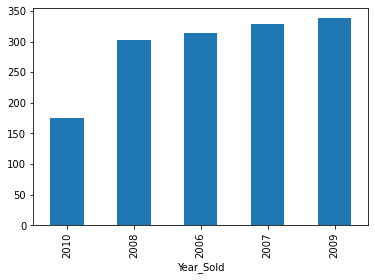

In [46]:
print("Number of houses sold:")
train.groupby('Year_Sold')['Id'].count().sort_values().plot(kind ='bar');

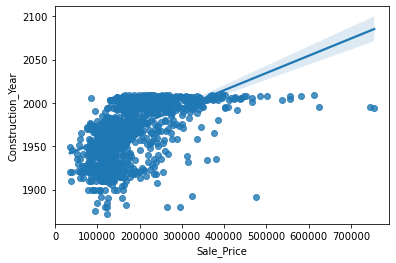

In [47]:
sns.regplot(x='Sale_Price', y="Construction_Year", data=train);

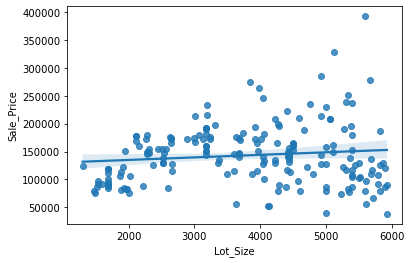

In [55]:
sm_lot = train[train['Lot_Size'] < 6000][['Lot_Size', 'Sale_Price']]

sns.regplot(x='Lot_Size', y="Sale_Price", data=sm_lot);

In [ ]:
num_mask =num_cols.drop(columns = ['Id'])
train_corr = num_mask.corr()
high_corr = train_corr[['saleprice']].sort_values("saleprice", ascending=False).head(15)
high_corr_cols = high_corr.index

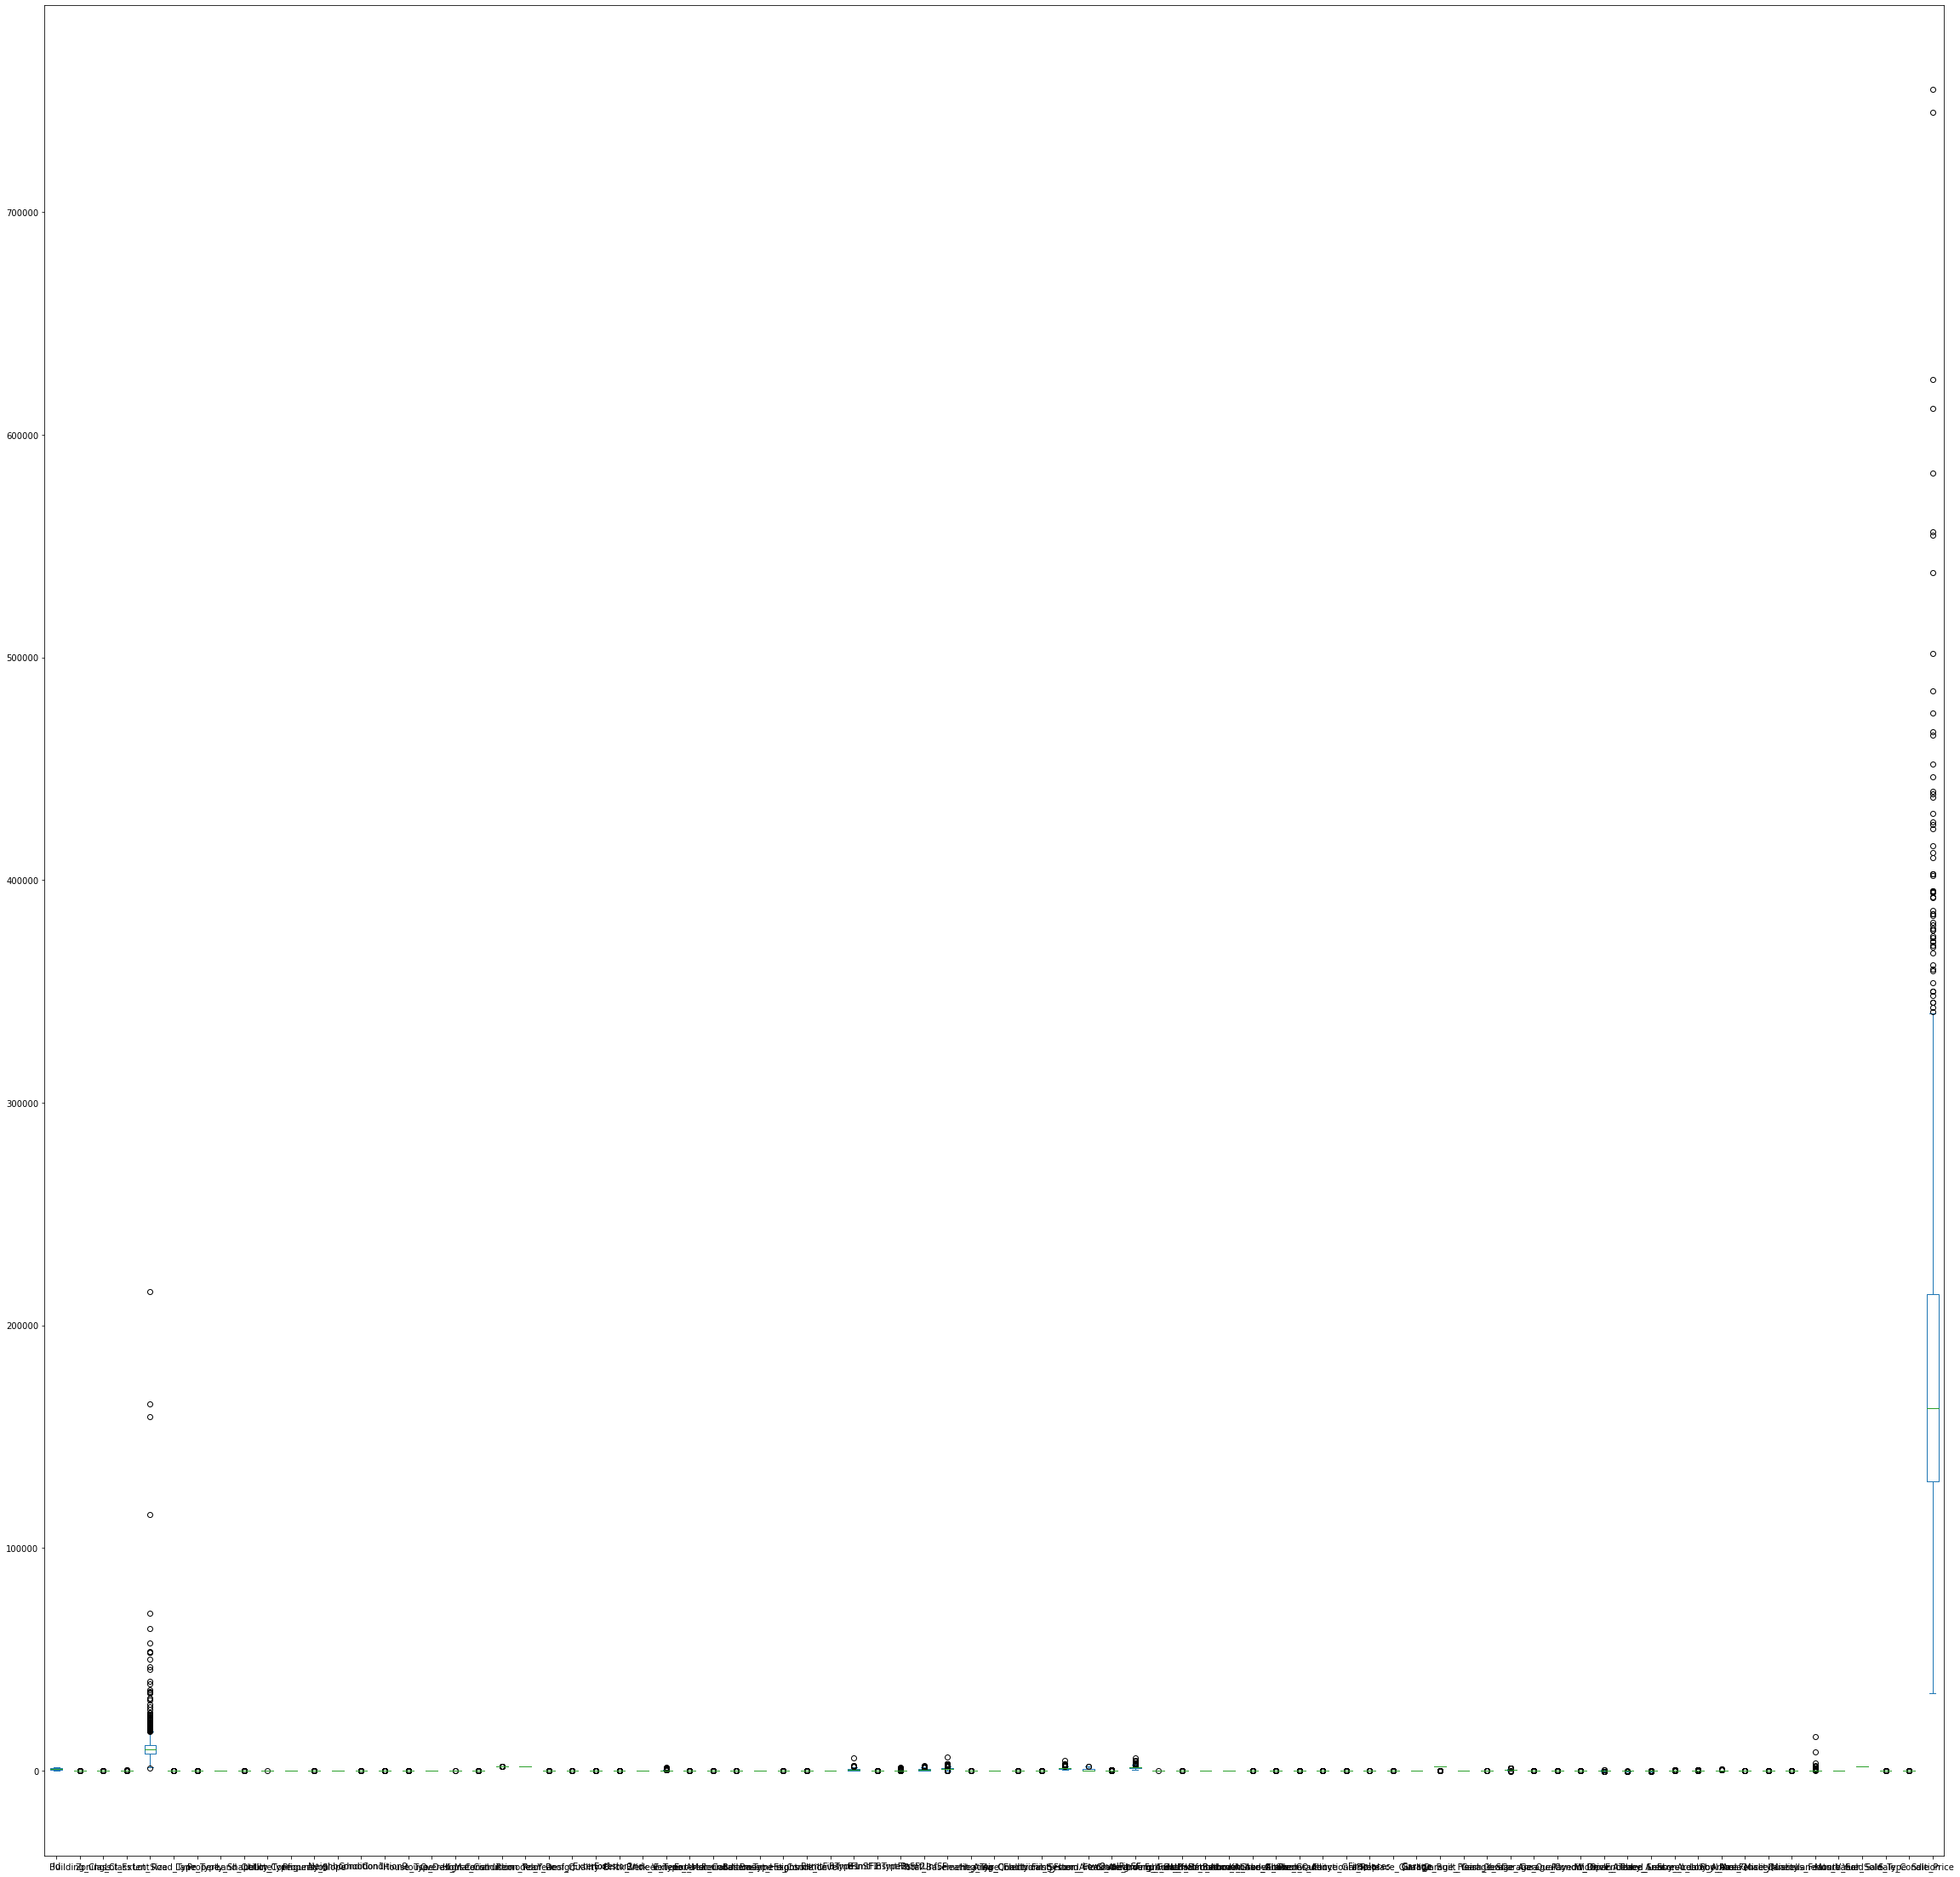

In [48]:
train.plot.box(figsize=(40,40))
plt.show()

<AxesSubplot:>

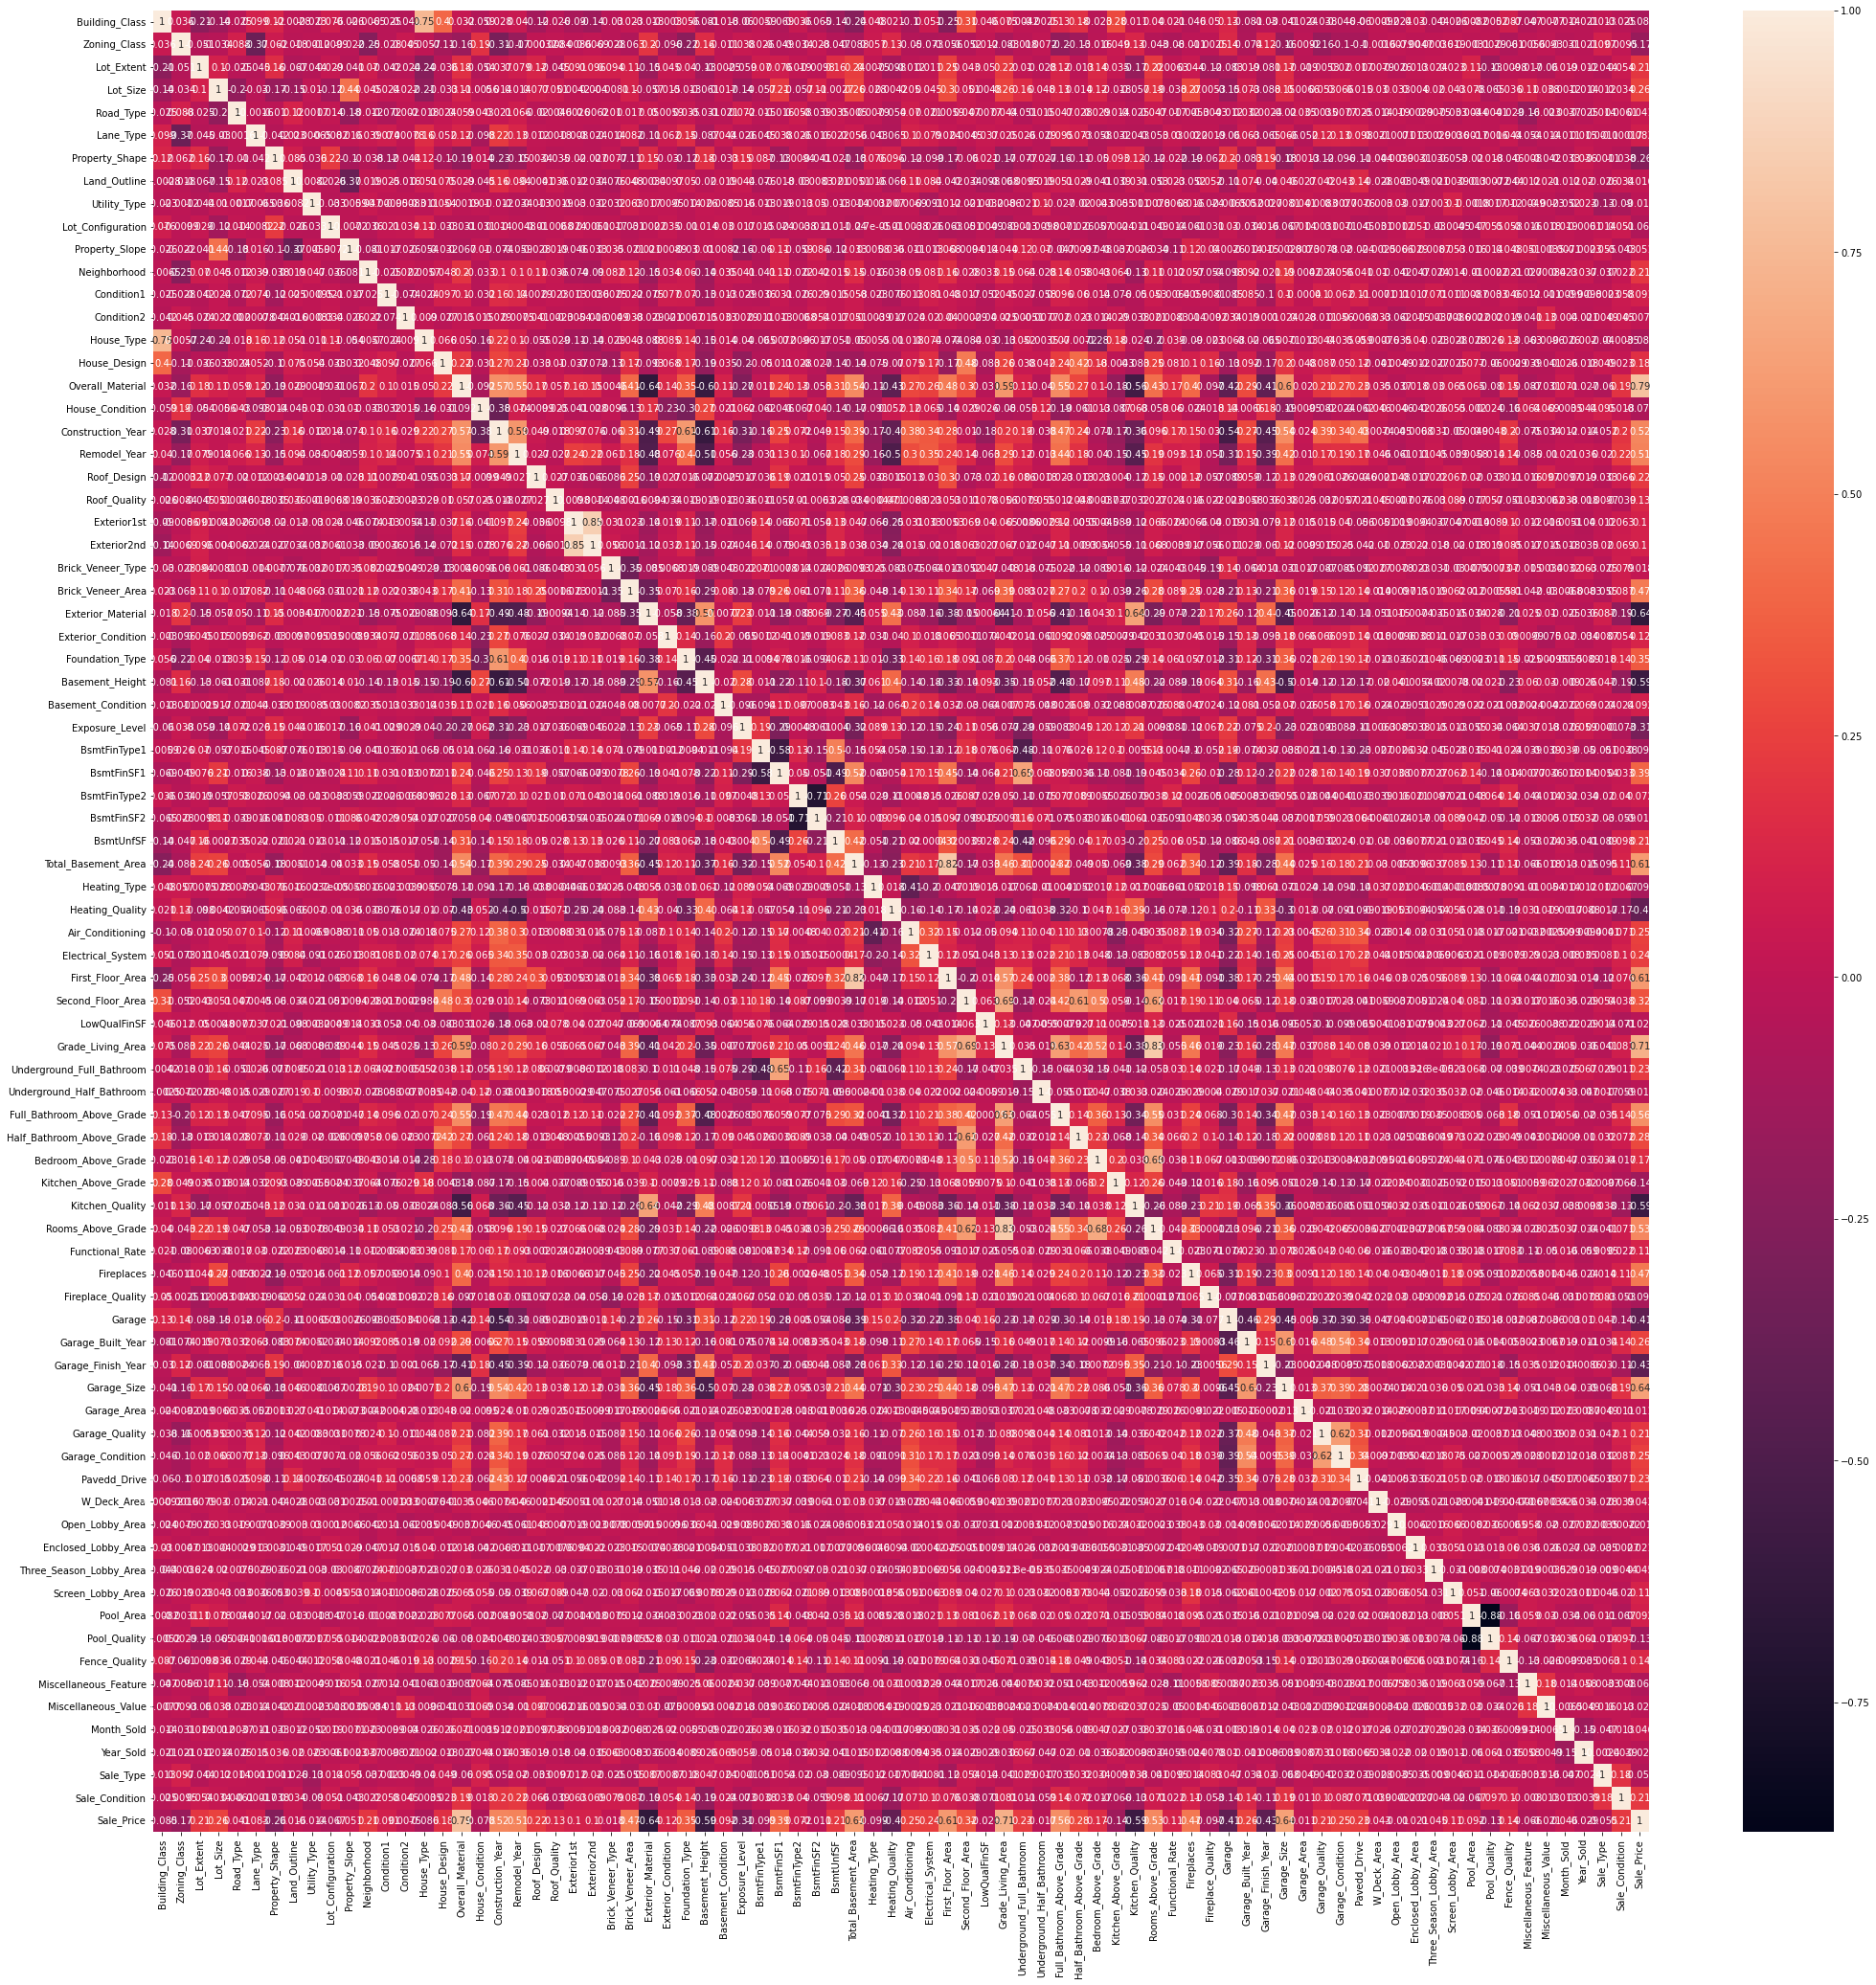

In [140]:
plt.figure(figsize= (35,35))
train_corr = train.corr()
train_features = train_corr.index
sns.heatmap(train[train_features].corr(), annot= True)

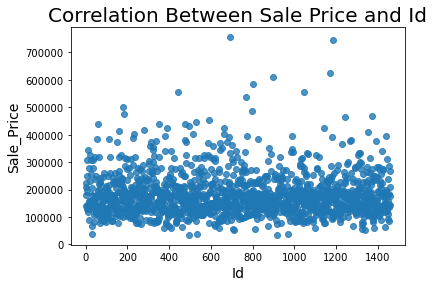

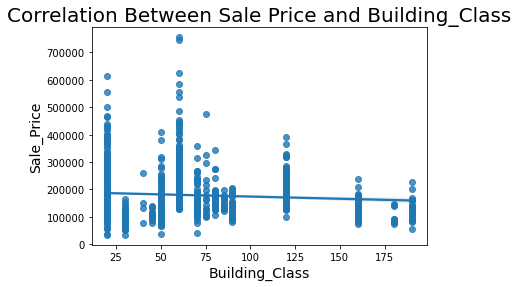

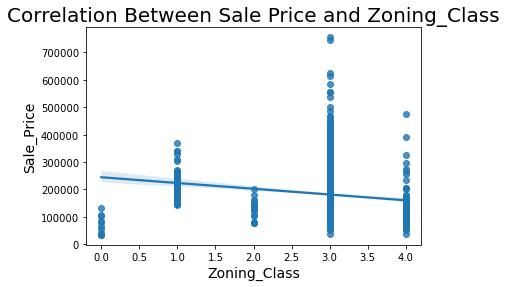

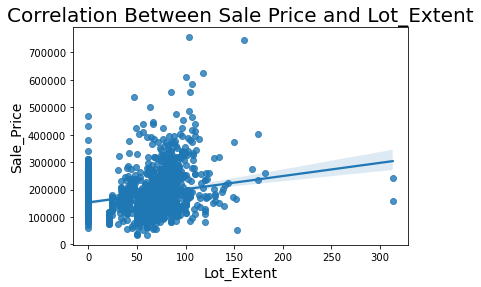

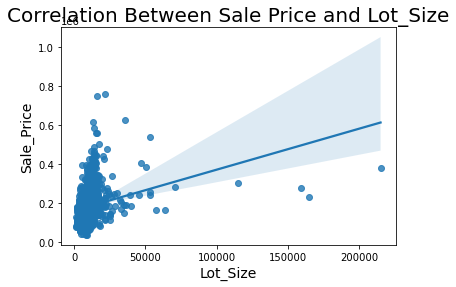

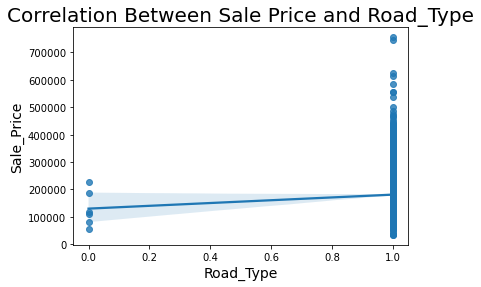

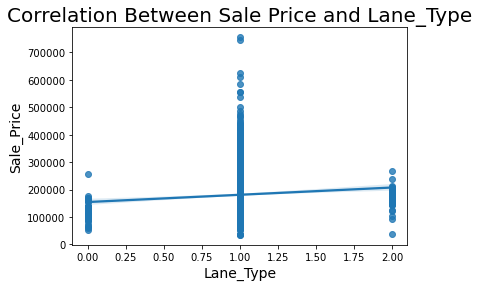

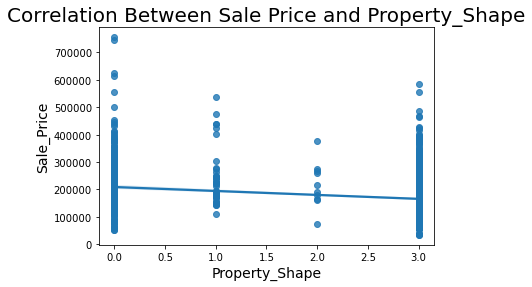

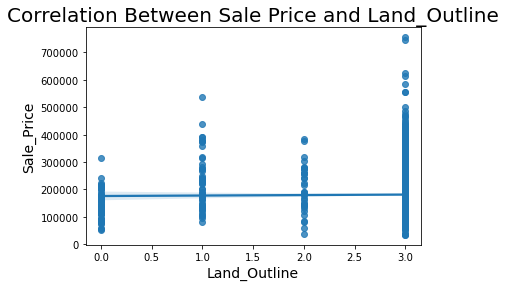

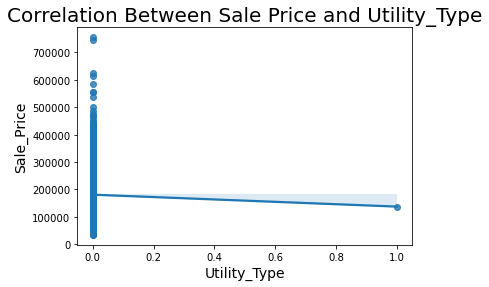

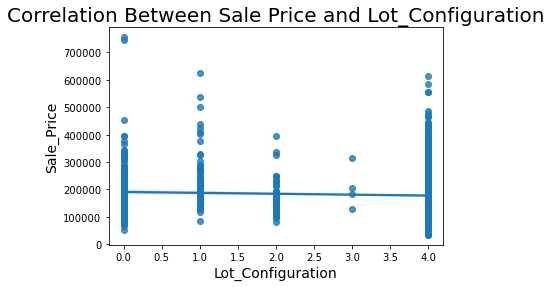

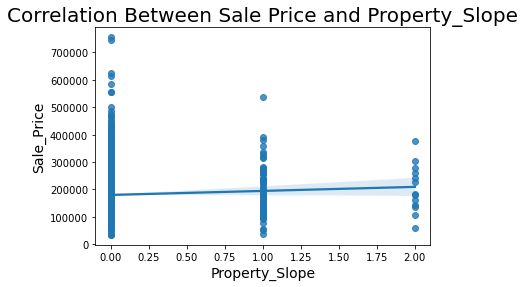

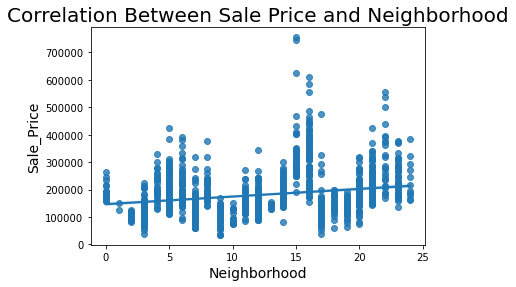

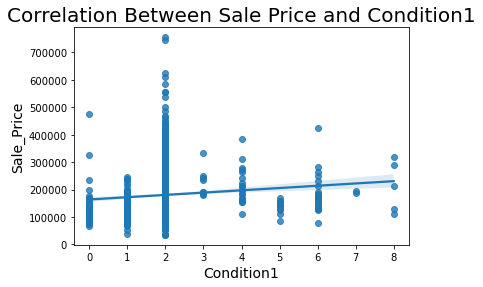

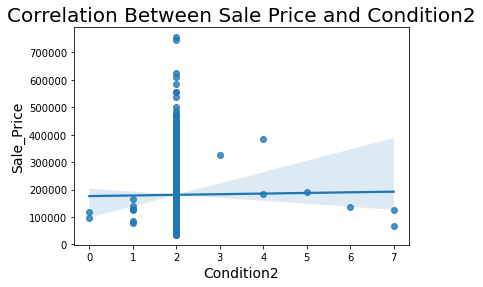

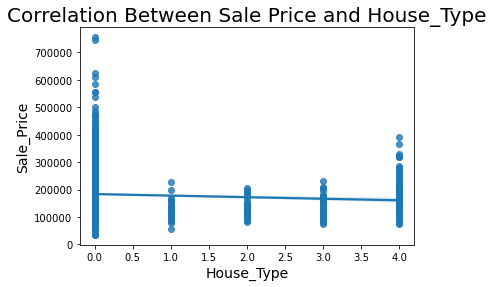

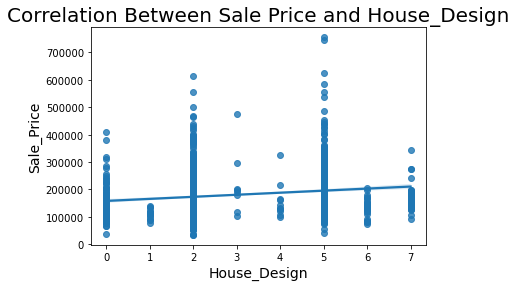

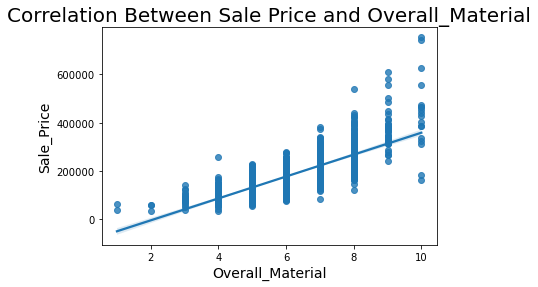

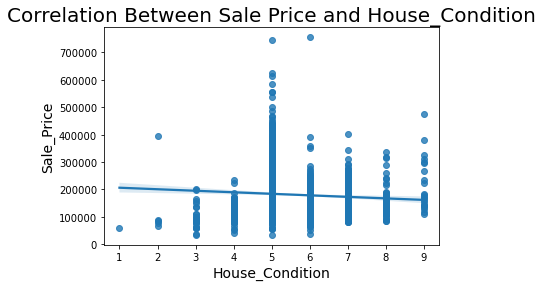

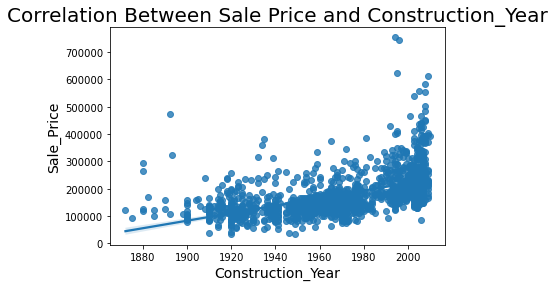

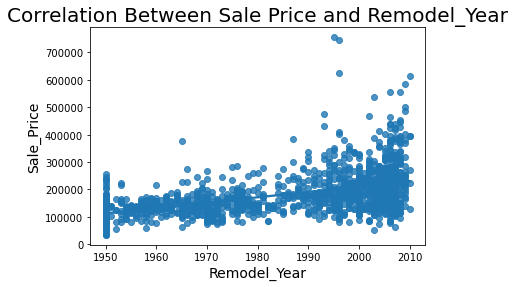

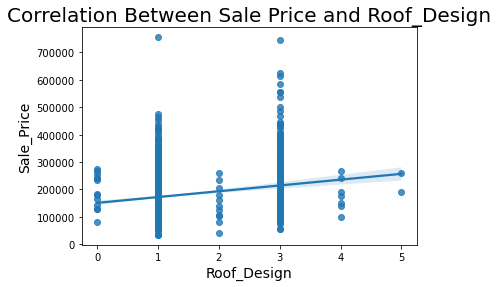

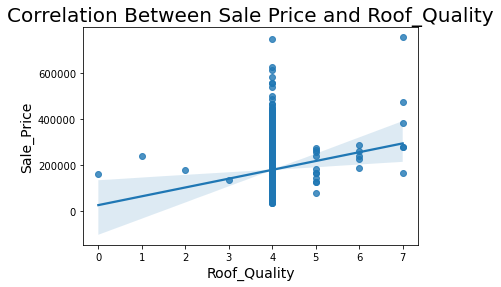

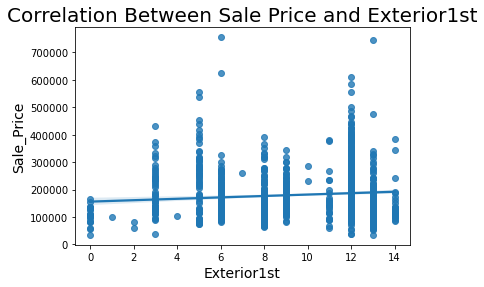

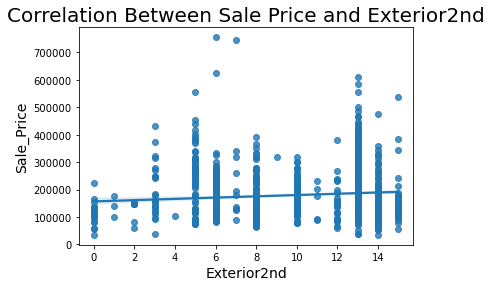

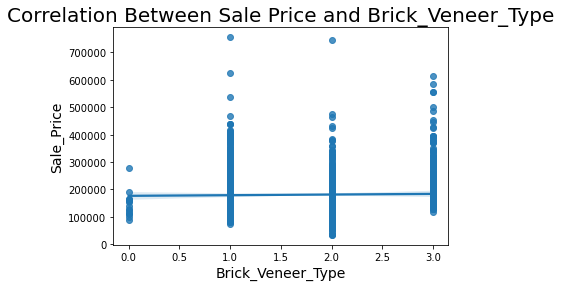

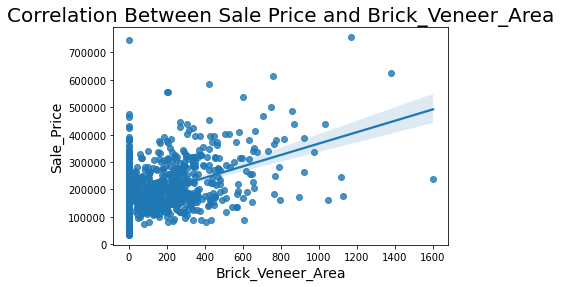

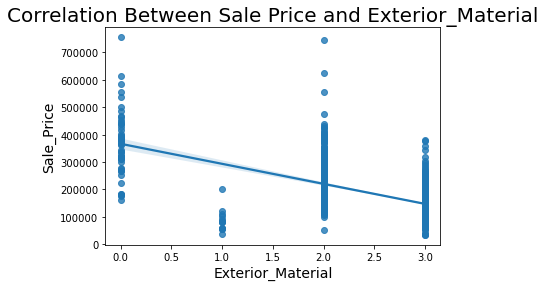

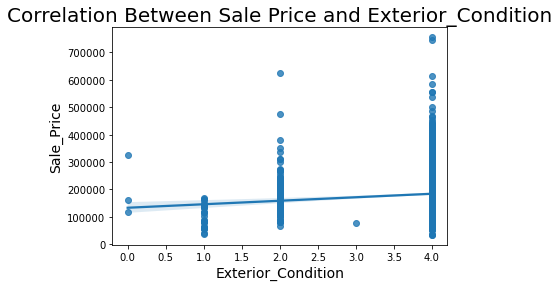

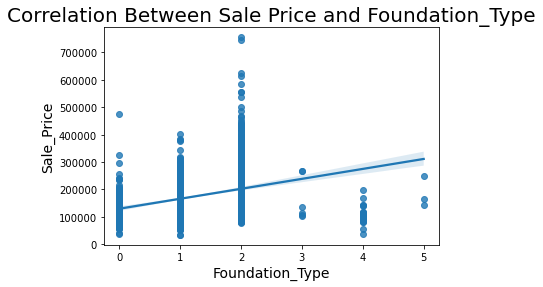

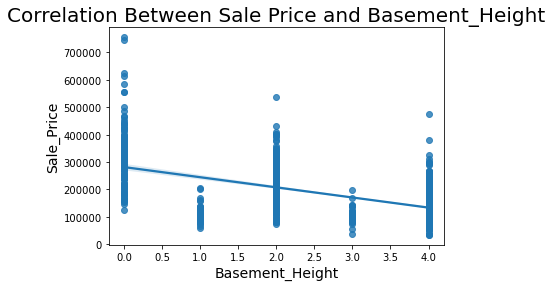

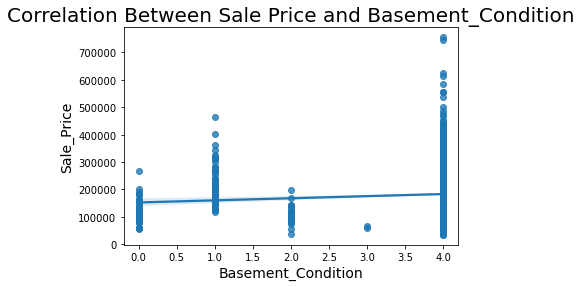

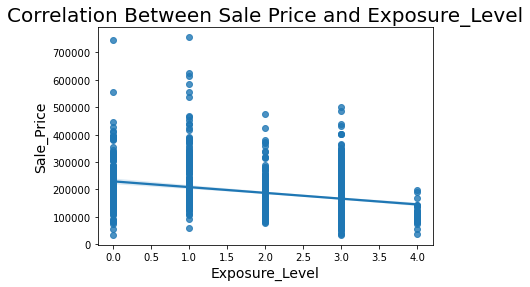

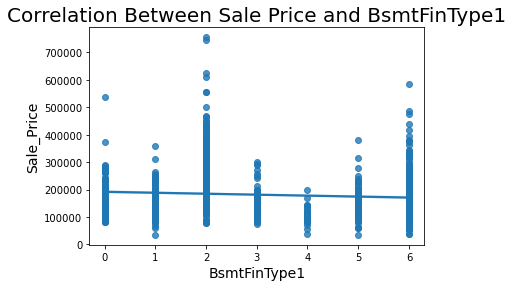

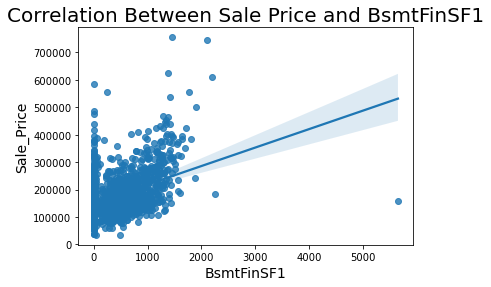

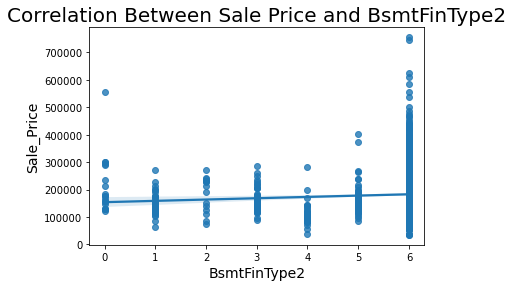

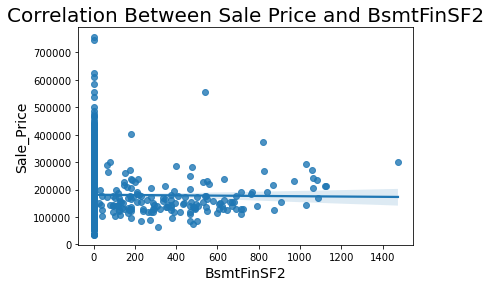

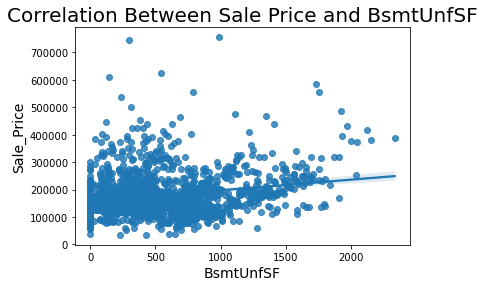

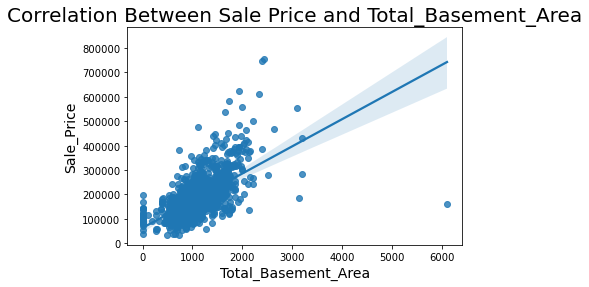

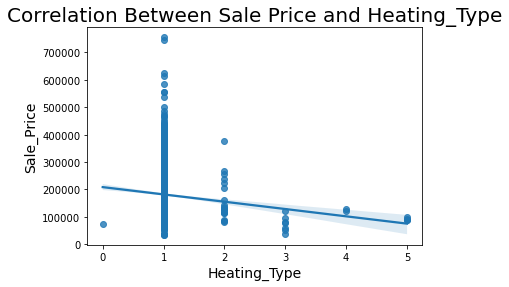

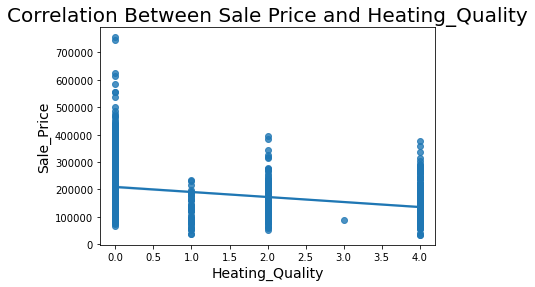

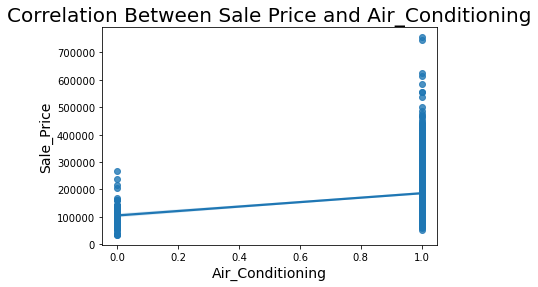

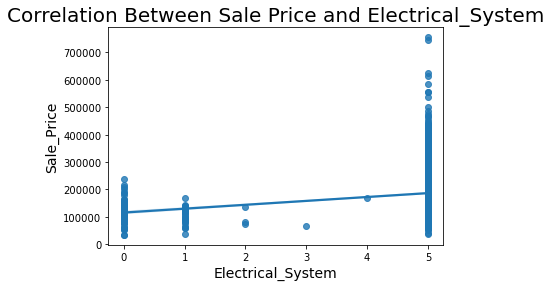

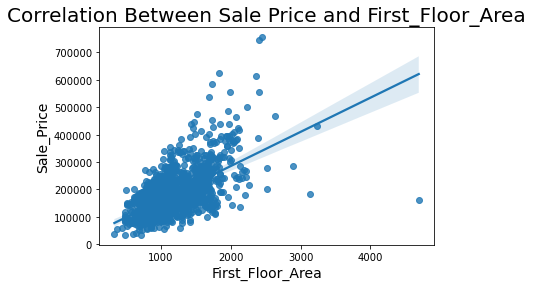

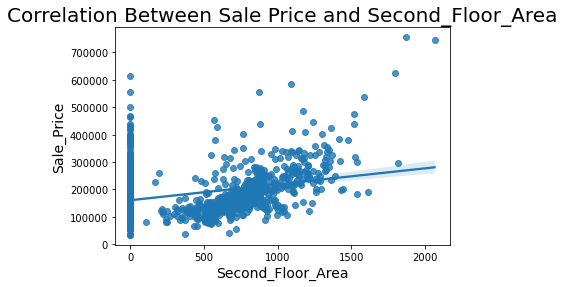

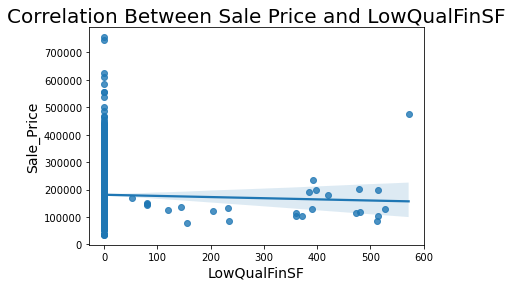

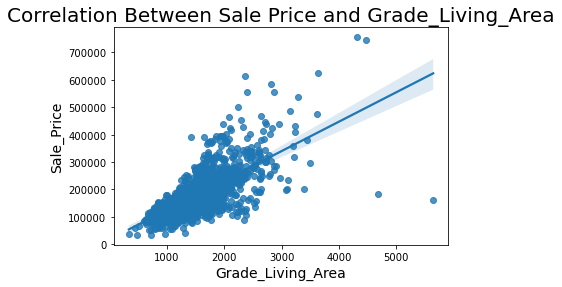

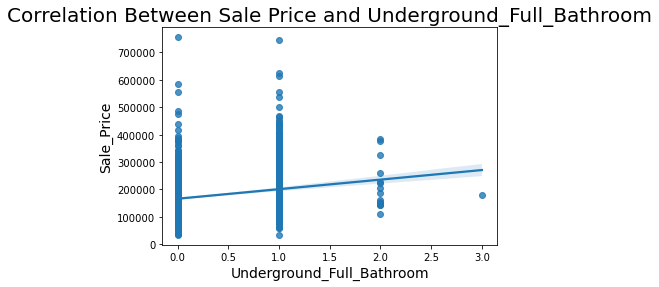

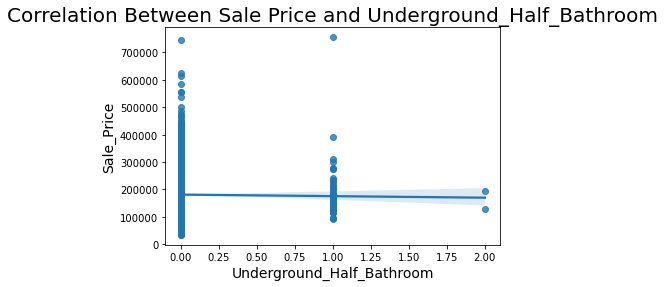

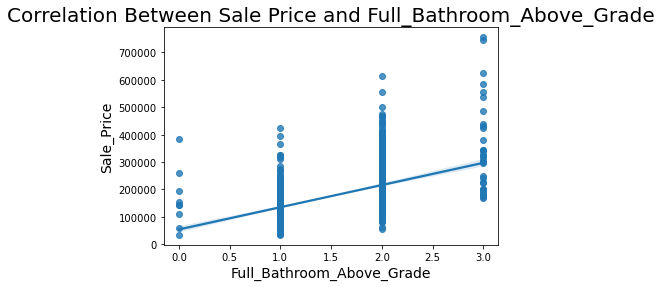

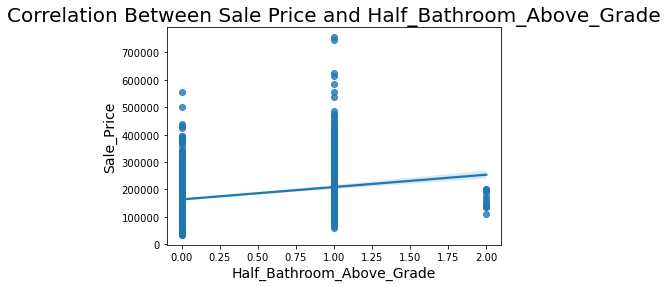

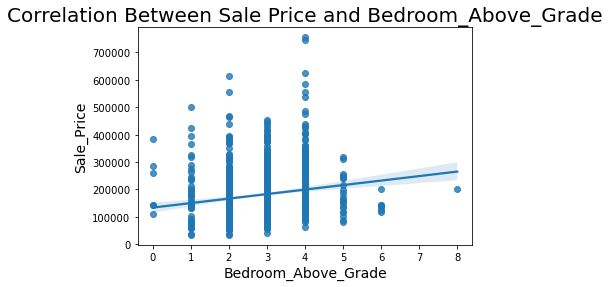

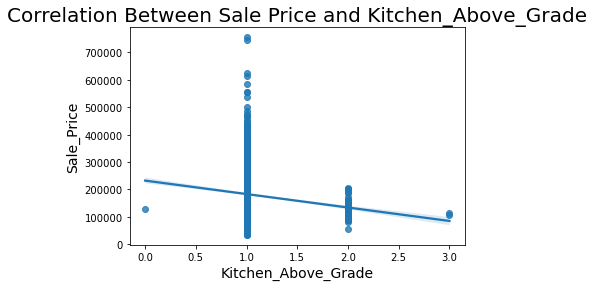

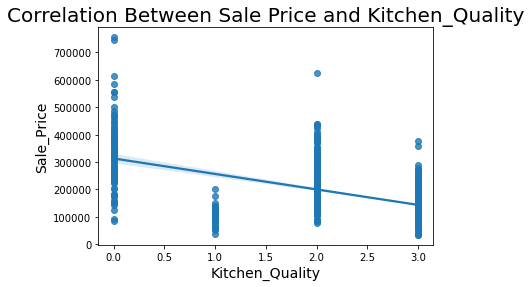

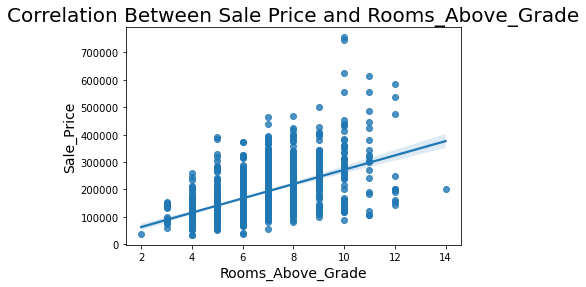

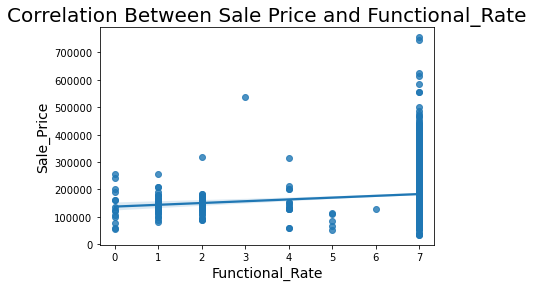

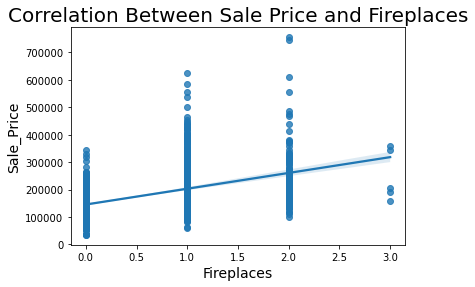

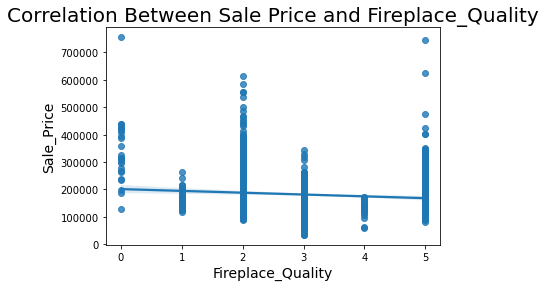

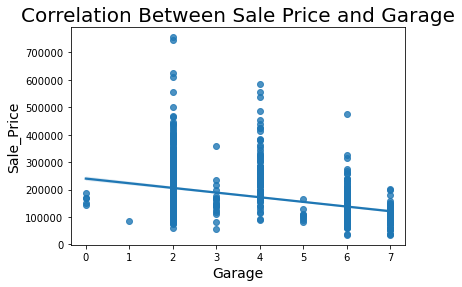

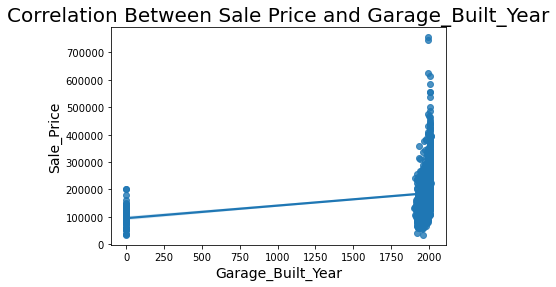

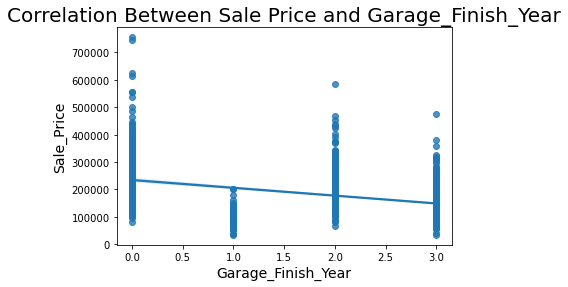

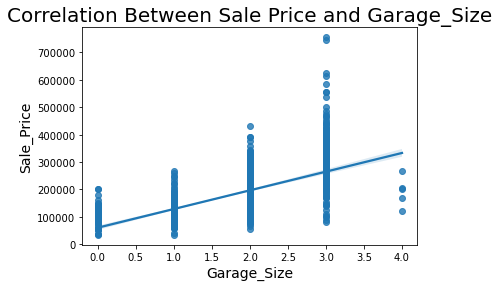

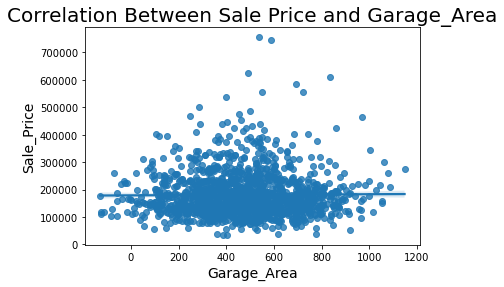

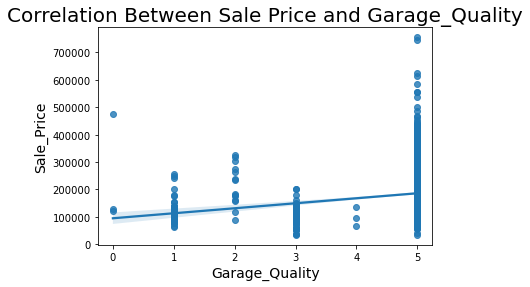

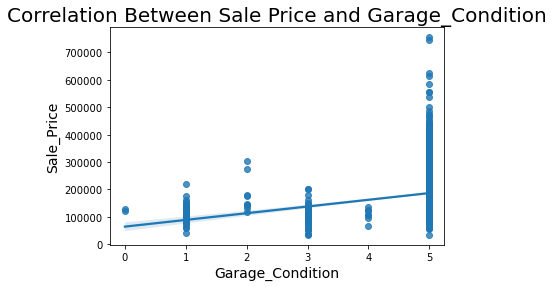

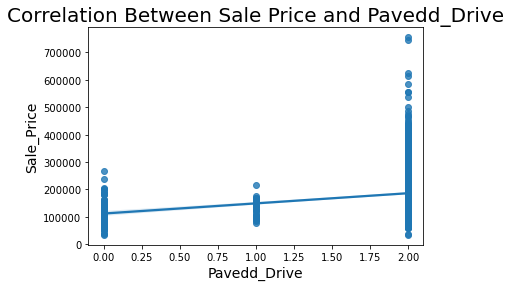

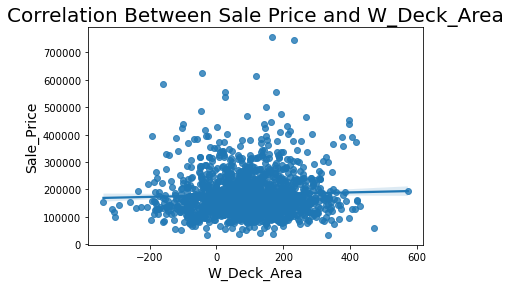

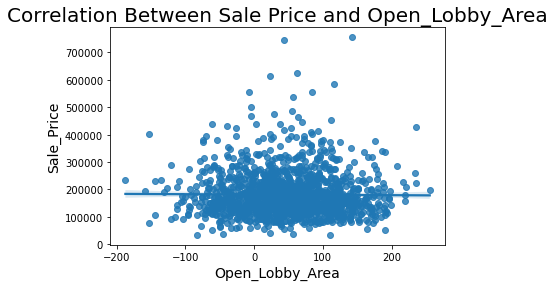

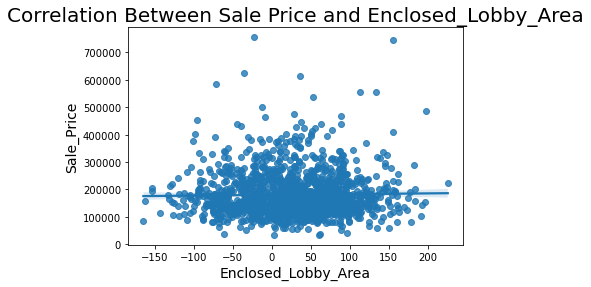

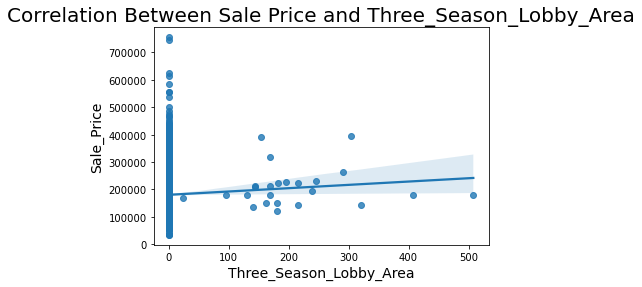

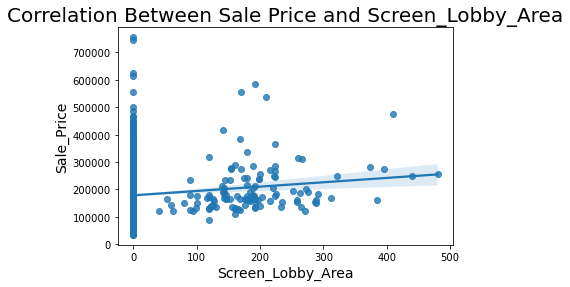

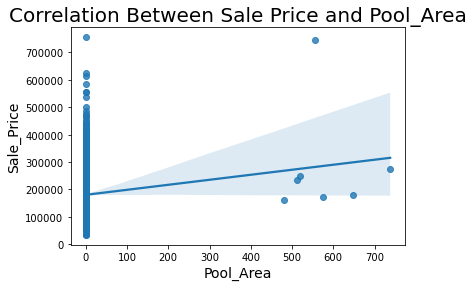

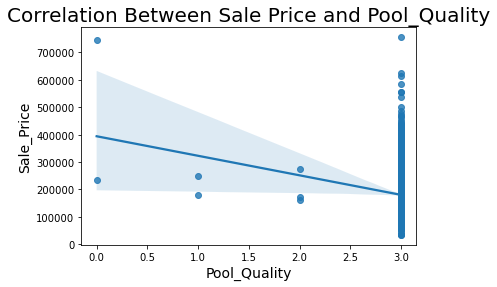

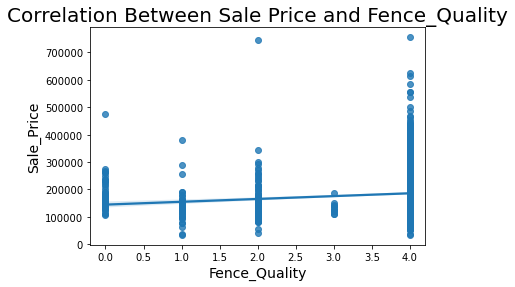

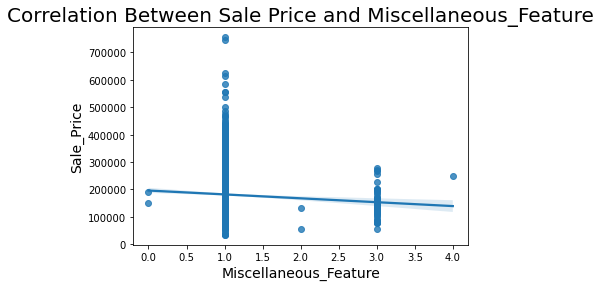

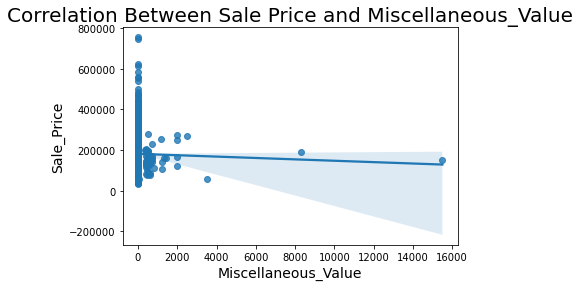

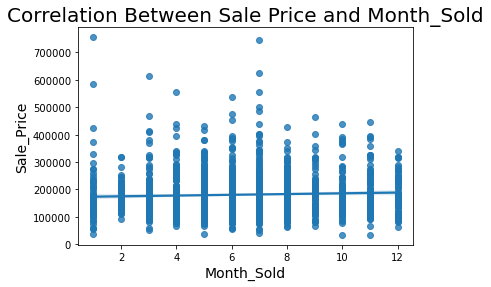

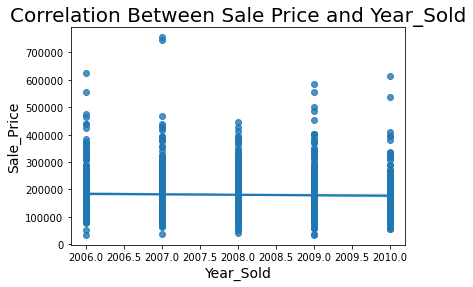

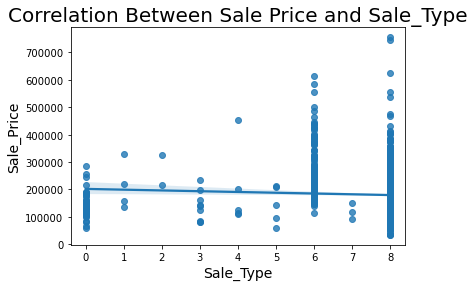

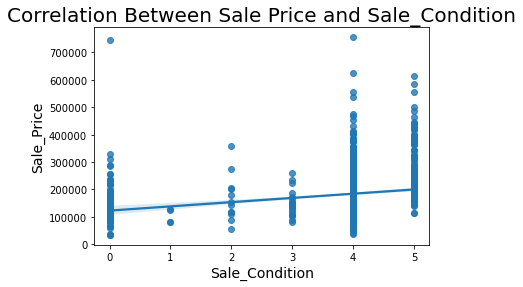

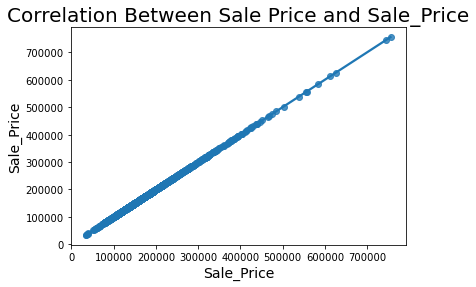

In [51]:
plt.figure()

for columns in train:
    
    
    sns.regplot(x=columns, y="Sale_Price", data=train);
    plt.title(f"Correlation Between Sale Price and {columns}", fontsize =20)
    plt.ylabel("Sale_Price", fontsize = 14)
    plt.xlabel(columns, fontsize = 14)

    plt.show()

C:\Users\admin\AppData\Local\Temp/ipykernel_13544/1167642573.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('Neighborhood')['Neighborhood', 'Sale_Price'].mean().sort_values('Sale_Price').plot(kind ='bar');


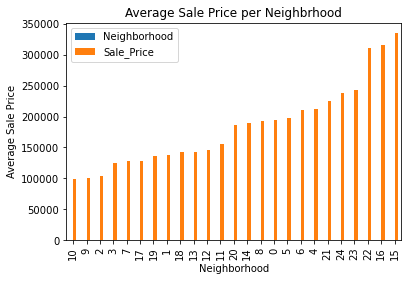

In [52]:
train.groupby('Neighborhood')['Neighborhood', 'Sale_Price'].mean().sort_values('Sale_Price').plot(kind ='bar');

plt.ylabel('Average Sale Price');
plt.title('Average Sale Price per Neighbrhood');

In [ ]:
t['Garage_Size'] = t['Garage_Size'].astype(int)
t['Garage_Area'] = t['Garage_Area'].astype(int)
t['Garage_Built_Year'] = t['Garage_Built_Year'].astype(int)
t['Underground_Full_Bathroom'] = t['Underground_Full_Bathroom'].astype(int)
t['Underground_Half_Bathroom'] = t['Underground_Half_Bathroom'].astype(int)
t['Total_Basement_Area'] = t['Total_Basement_Area'].astype(int)
t['BsmtUnfSF'] = t['BsmtUnfSF'].astype(int)
t['BsmtFinSF2'] = t['BsmtFinSF2'].astype(int)
t['BsmtFinSF1'] = t['BsmtFinSF1'].astype(int)
t['Brick_Veneer_Area'] = t['Brick_Veneer_Area'].astype(int)

In [ ]:
train['Brick_Veneer_Area'] = train['Brick_Veneer_Area'].astype(int)
train['Garage_Built_Year'] = train['Garage_Built_Year'].astype(int)
train['Garage_Area'] = train['Garage_Area'].astype(int)
train['Lot_Extent'] = train['Lot_Extent'].astype(int)
train['W_Deck_Area'] = train['W_Deck_Area'].astype(int)
train['Open_Lobby_Area'] = train['Open_Lobby_Area'].astype(int)
train['Enclosed_Lobby_Area'] = train['Enclosed_Lobby_Area'].astype(int)

In [53]:
t["Sale_Price"] = ""

In [60]:
t.head(2)

Building_Class  Zoning_Class  Lot_Extent     Lot_Size  Road_Type  \
0              20             3        80.0  16104.81976          1   
1              20             4        81.0  15639.15081          1   

   Lane_Type  Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
0          1               3             3             0                  4   
1          1               0             3             0                  0   

   ...  Pool_Area  Pool_Quality  Fence_Quality  Miscellaneous_Feature  \
0  ...          0             2              2                      1   
1  ...          0             2              4                      0   

   Miscellaneous_Value  Month_Sold  Year_Sold  Sale_Type  Sale_Condition  \
0                    0           6       2010          9               6   
1                12500           6       2010          9               6   

   Sale_Price  
0              
1              

[2 rows x 80 columns]

In [61]:
X_train = train.iloc[:, :-1]
y_train = train["Sale_Price"]
X_test = t.iloc[:, :-1]
y_test = t["Sale_Price"]

In [62]:
X_train

Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
0                 60             3        65.0      8450          1   
1                 20             3        80.0      9600          1   
2                 60             3        68.0     11250          1   
3                 70             3        60.0      9550          1   
4                 60             3        84.0     14260          1   
...              ...           ...         ...       ...        ...   
1454              20             1        62.0      7500          1   
1455              60             3        62.0      7917          1   
1456              20             3        85.0     13175          1   
1457              70             3        66.0      9042          1   
1458              20             3        68.0      9717          1   

      Lane_Type  Property_Shape  Land_Outline  Utility_Type  \
0             1               3             3             0   
1             1               3             3             0   
2             1               0             3             0   
3             1               0             3             0   
4             1               0             3             0   
...         ...             ...           ...           ...   
1454          2               3             3             0   
1455          1               3             3             0   
1456          1               3             3             0   
1457          1               3             3             0   
1458          1               3             3             0   

      Lot_Configuration  ...  Screen_Lobby_Area  Pool_Area  Pool_Quality  \
0                     4  ...                  0          0             3   
1                     2  ...                  0          0             3   
2                     4  ...                  0          0             3   
3                     0  ...                  0          0             3   
4                     2  ...                  0          0             3   
...                 ...  ...                ...        ...           ...   
1454                  4  ...                  0          0             3   
1455                  4  ...                  0          0             3   
1456                  4  ...                  0          0             3   
1457                  4  ...                  0          0             3   
1458                  4  ...                  0          0             3   

      Fence_Quality  Miscellaneous_Feature  Miscellaneous_Value  Month_Sold  \
0                 4                      1                    0           2   
1                 4                      1                    0           5   
2                 4                      1                    0           9   
3                 4                      1                    0           2   
4                 4                      1                    0          12   
...             ...                    ...                  ...         ...   
1454              4                      1                    0          10   
1455              4                      1                    0           8   
1456              2                      1                    0           2   
1457              0                      3                 2500           5   
1458              4                      1                    0           4   

      Year_Sold  Sale_Type  Sale_Condition  
0          2008          8               4  
1          2007          8               4  
2          2008          8               4  
3          2006          8               0  
4          2008          8               4  
...         ...        ...             ...  
1454       2009          8               4  
1455       2007          8               4  
1456       2010          8               4  
1457       2010          8               4  
1458       2010          8             

In [63]:
X_test

Building_Class  Zoning_Class  Lot_Extent      Lot_Size  Road_Type  \
0                 20             3        80.0  16104.819760          1   
1                 20             4        81.0  15639.150810          1   
2                 60             4        74.0   3849.428920          1   
3                 60             4        78.0   4955.447942          1   
4                120             4        43.0   3046.604942          1   
...              ...           ...         ...           ...        ...   
1454             160             5        21.0  14584.838440          1   
1455             160             5        21.0   8072.991379          1   
1456              20             4       160.0   7367.775348          1   
1457              85             4        62.0   2203.135444          1   
1458              60             4        74.0   6253.431852          1   

      Lane_Type  Property_Shape  Land_Outline  Utility_Type  \
0             1               3             3             0   
1             1               0             3             0   
2             1               0             3             0   
3             1               0             3             0   
4             1               0             1             0   
...         ...             ...           ...           ...   
1454          1               3             3             0   
1455          1               3             3             0   
1456          1               3             3             0   
1457          1               3             3             0   
1458          1               3             3             0   

      Lot_Configuration  ...  Screen_Lobby_Area  Pool_Area  Pool_Quality  \
0                     4  ...                120          0             2   
1                     0  ...                  0          0             2   
2                     4  ...                  0          0             2   
3                     4  ...                  0          0             2   
4                     4  ...                144          0             2   
...                 ...  ...                ...        ...           ...   
1454                  4  ...                  0          0             2   
1455                  4  ...                  0          0             2   
1456                  4  ...                  0          0             2   
1457                  4  ...                  0          0             2   
1458                  4  ...                  0          0             2   

      Fence_Quality  Miscellaneous_Feature  Miscellaneous_Value  Month_Sold  \
0                 2                      1                    0           6   
1                 4                      0                12500           6   
2                 2                      1                    0           3   
3                 4                      1                    0           6   
4                 4                      1                    0           1   
...             ...                    ...                  ...         ...   
1454              4                      1                    0           6   
1455              4                      1                    0           4   
1456              4                      1                    0           9   
1457              2                      3                  700           7   
1458              4                      1                    0          11   

      Year_Sold  Sale_Type  Sale_Condition  
0          2010          9               6  
1          2010          9               6  
2          2010          9               6  
3          2010          9               6  
4          2010          9               6  
...         ...        ...             ...  
1454       2006          9               5  
1455       2006          9               0  
1456       2006          9               1  
1457       2006          9          

In [64]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: Sale_Price, Length: 1459, dtype: int64

In [65]:
y_test

0        
1        
2        
3        
4        
       ..
1454     
1455     
1456     
1457     
1458     
Name: Sale_Price, Length: 1459, dtype: object

# Linear Regession

In [66]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(normalize=True)

In [67]:
model1.fit(X_train, y_train)

LinearRegression(normalize=True)

In [68]:
model_pred = model1.predict(X_test)

In [69]:
t["Sale_Price"] = model_pred

In [70]:
t.head(3)

Building_Class  Zoning_Class  Lot_Extent     Lot_Size  Road_Type  \
0              20             3        80.0  16104.81976          1   
1              20             4        81.0  15639.15081          1   
2              60             4        74.0   3849.42892          1   

   Lane_Type  Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
0          1               3             3             0                  4   
1          1               0             3             0                  0   
2          1               0             3             0                  4   

   ...  Pool_Area  Pool_Quality  Fence_Quality  Miscellaneous_Feature  \
0  ...          0             2              2                      1   
1  ...          0             2              4                      0   
2  ...          0             2              2                      1   

   Miscellaneous_Value  Month_Sold  Year_Sold  Sale_Type  Sale_Condition  \
0                    0           6       2010          9               6   
1                12500           6       2010          9               6   
2                    0           3       2010          9               6   

      Sale_Price  
0   74143.226914  
1  126904.199033  
2  129653.820957  

[3 rows x 80 columns]

In [71]:
t['Sale_Price'] = t['Sale_Price'].astype(int)

In [72]:
from sklearn.metrics import r2_score

In [73]:
y_test1 = t["Sale_Price"]

In [91]:
linear_reg =r2_score(y_test1,model_pred )
linear_reg

0.9999999999418595

In [75]:
model1.coef_

array([-9.51208661e+01, -6.36250755e+02, -2.61489472e+01,  3.59252430e-01,
        3.00103607e+04,  2.88424816e+03, -8.70391476e+02,  3.06146499e+03,
       -5.36243256e+04,  4.94417193e+01,  7.55186368e+03,  3.91687471e+02,
       -9.90160303e+02, -8.97571179e+03, -2.38403952e+03, -1.41159246e+03,
        1.07953512e+04,  5.87399695e+03,  2.23391262e+02,  1.00652747e+01,
        1.68668502e+03,  2.62524757e+04, -9.84248035e+02,  3.21026790e+02,
        4.73039269e+03,  3.53884805e+01, -9.21311194e+03,  9.62961737e+02,
        1.65546660e+03, -4.20848064e+03,  9.37321196e+02, -3.62455851e+03,
       -5.64815732e+02, -5.22257964e+13,  6.99089280e+02, -5.22257964e+13,
       -5.22257964e+13,  5.22257964e+13, -2.66073720e+03, -9.69156768e+02,
       -8.01962025e+01, -5.75019057e+02,  7.47657314e+13,  7.47657314e+13,
        7.47657314e+13, -7.47657314e+13,  5.43567539e+03, -1.17622808e+03,
        2.87076410e+03, -5.46921980e+02, -3.90208386e+03, -1.34028601e+04,
       -7.96703992e+03,  

In [76]:
model1.intercept_

1161904.102810144

In [77]:
model1.score(X_train, y_train)

0.8576368534644999

In [78]:
model1.score(X_test, y_test1)

0.9999999999418595

In [80]:
from sklearn.linear_model import Lasso

In [81]:
model2 = Lasso(alpha=100)

In [82]:
model2.fit(X_train,y_train)

Lasso(alpha=100)

In [83]:
model2.score(X_train,y_train)

0.8560904963365049

In [84]:
model2.score(X_test,y_test1)

0.8963366101035053

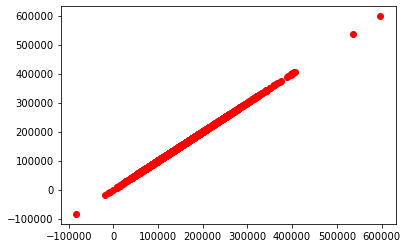

In [92]:
plt.scatter(y_test1,model_pred,color ='red')
plt.show()

In [85]:
from sklearn.metrics import  mean_squared_error

In [102]:
predictions = model2.predict(X_train)
predictions.mean()

180944.10281014387

In [103]:
np.sqrt(mean_squared_error(y_train, predictions))

30135.00689133796

In [105]:
r2_score(y_train, predictions)

0.8560904963365049

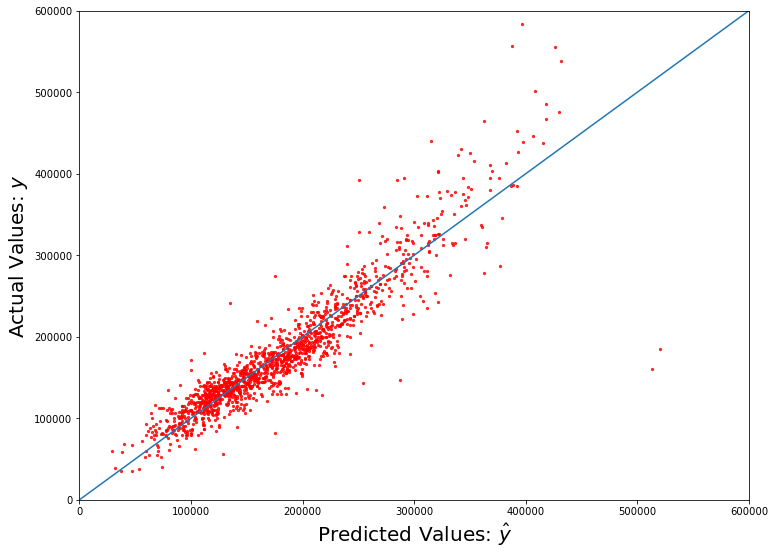

In [106]:
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.

plt.scatter(predictions, y_train, s=5, color='red', alpha = 0.8)
plt.xlim((0,600_000))
plt.ylim((0,600_000))
# Plot a line.

plt.plot([0, 600_000],[0, 600_000])

# Tweak title and axis labels.

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20);

# Random Forest Regressor Algorithm Implementation

In [108]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [109]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [110]:
conf = model.score(X_test, y_test1)
print(conf)

0.7841292097516783


In [111]:
model.score(X_train,y_train)

0.980264145493609

In [112]:
model.score(X_test,y_test1)

0.7841292097516783

In [113]:
model3 = Lasso(alpha=100)

In [114]:
model3.fit(X_train,y_train)

Lasso(alpha=100)

In [115]:
model3.score(X_train,y_train)

0.8560904963365049

In [116]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators = 100, criterion="mse")
model3.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
rfreg_ypredict = model3.predict(X_test)
rfreg_ypredict

array([124689.83, 152615.25, 163731.87, ..., 144570.8 , 112236.  ,
       215025.42])

In [119]:
rfreg_score = r2_score(rfreg_ypredict, y_test1)
rfreg_score

0.7644499982978084

# KNN Regressor Algorithm Implementation

In [120]:
from sklearn.neighbors import KNeighborsRegressor
knnregmodel = KNeighborsRegressor(n_neighbors=5)
knnregmodel.fit(X_train, y_train)

KNeighborsRegressor()

In [121]:
knnreg_ypredict = knnregmodel.predict(X_test)
knnreg_ypredict

array([159660. , 205680. , 142666.8, ..., 161907.4,  89200. , 156700. ])

In [122]:
knnreg_ypredict1 = r2_score(y_test1,knnreg_ypredict)
knnreg_ypredict1

0.37578921005809685

# Support Vector Machine Regressor Algorithm Implementation

In [123]:
from sklearn.svm import SVR
svrmodel = SVR(kernel="linear")
svrmodel.fit(X_train,y_train)

SVR(kernel='linear')

In [124]:
svr_ypredict = svrmodel.predict(X_test)
svr_ypredict

array([122226.855161  , 181143.43529593, 197407.48981688, ...,
       175932.28450176, 122663.78279842, 226732.94817122])

In [125]:
svr_score = r2_score(svr_ypredict, y_test1)
svr_score

0.6320540946558966

# Decision Tree Regressor Algorithm Implementation

In [126]:
from sklearn.tree import DecisionTreeRegressor
dtregmodel = DecisionTreeRegressor()
dtregmodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [127]:
dtr_ypredict = dtregmodel.predict(X_test)
dtr_ypredict

array([124500., 129000., 173000., ..., 148000., 100000., 192000.])

In [135]:
dtreg_score = r2_score(y_test1, dtr_ypredict)
dtreg_score

0.5634054310929648

In [136]:
columns_reg = ["Linear Regression Algorithm","KNN Regression Algorithm","SVM Regression Algorithm",
          "Decision Tree Regression Algorithm", "Random Forest Regression Algorithm"]
Data_reg = [linear_reg * 100,knnreg_ypredict1* 100, svr_score * 100,  dtreg_score * 100,  rfreg_score* 100]

In [137]:
dict1_reg = {
    "Regression Algorithms Implemented" : columns_reg,
    "R2 Scores" : Data_reg
}

In [138]:
Regression_Scores = pd.DataFrame(dict1_reg, index = [1,2,3,4,5])
Regression_Scores

Regression Algorithms Implemented   R2 Scores
1         Linear Regression Algorithm  100.000000
2            KNN Regression Algorithm   37.578921
3            SVM Regression Algorithm   63.205409
4  Decision Tree Regression Algorithm   56.340543
5  Random Forest Regression Algorithm   76.445000

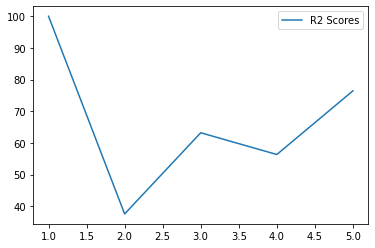

In [139]:
_ = Regression_Scores.plot(kind = "line")